# Problem Statement


---














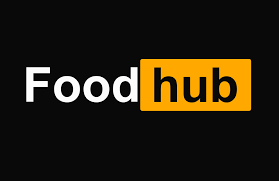


---


**FOODHUB**

---

*   The number of restaurants in New York is increasing day by day cause of students and busy professionals relying on the restaurants due to their hectic lifestyles.
*Online food delivery service is a great option
which provides them with good food from their favorite restaurants.
* Being a food aggregator company,FoodHub offers access to multiple restaurants through a single smartphone app.






---


**OPERATIONS OF FOODHUB APP**

---


* The app allows restaurants to receive a direct online order from a customer.
*The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant.
*The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over he/she confirms the pick-up in the app
* Travels to the customer's location to deliver the food.
*The delivery person confirms the drop-off in the app after delivering. *The customer can rate the order in the app.
*The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.







---


**OBJECTIVE**

---
* The food aggregator company has stored the data of the different orders made by the registered customers in their online portal.
* Analyze the data to get a fair idea about the demand of different restaurants which will help in enhancing FOODHUB customer experience.







#Data Dictionary



---


**DATA DICTIONARY**

---

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Price paid per order
* day_of_the_week: Indicates whether the order is placed on a weekday or  weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to  prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


#  Importing The Libraries

In [ ]:
#Importing  the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

# Importing The Datafile



In [ ]:
# mounting to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading a data file
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

# Head and tail of the dataset

In [ ]:
# checking first five rows of the dataset
df.head()

order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

In [ ]:
#checking last five rows of the dataset
df.tail()

order_id  customer_id                        restaurant_name  \
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
1893        Mexican              22.31         Weekend          5   
1894       American              12.18         Weekend          5   
1895       Japanese              25.22         Weekday  Not given   
1896  Mediterranean              12.18         Weekday          5   
1897       Japanese              19.45         Weekend  Not given   

      food_preparation_time  delivery_time  
1893                     31             17  
1894                     31             19  
1895                     31             24  
1896                     23             31  
1897                     28             24

# Question 1:
### How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Understanding the shape of data set---no.of rows vs no.columns
df.shape

(1898, 9)

 ---
 **OBSERVATION**   **:**


* The datset has a total of 1898 rows with 9 columns present in it.



---




# Question 2:
What are the datatypes of the different columns in the dataset?  [0.5 mark]

In [ ]:
# Analyzing the data types present in the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB




---
 **OBSERVATION**   **:**

* The dataset has float(64)-1 , int(64)-4 , object-4.
* From the above information, we can see that typically the datatype for ***order_id*** and ***customer_id*** are treated as integer values and ***rating*** as a object .These need to be inspected.



---




# Changing Datatype

In [ ]:
# changing order_id and customer_id datatype
df['order_id'] = df['order_id'].astype(str)
df['customer_id'] = df['customer_id'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 133.6+ KB



---
 **OBSERVATION**   **:**

* The datatype of order_id and customer_id are changed to object type since they are unique ids given to orders made .



---

In [ ]:
# changing 'rating' entries 'Not given' to nan and change its datatype
#Int(64)--pandas-specific nullable integer type that can handle missing values (NaNs).
df['rating'] = df['rating'].replace('Not given', np.nan)
df['rating'] = df['rating'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   Int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: Int64(1), float64(1), int64(2), object(5)
memory usage: 135.4+ KB



---
 **OBSERVATION**   **:**

* The datatype of ratings is changed to integer which was object prior as it has numerical values (0-5) which can be used for further analysis.



---

In [ ]:
# New info of datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   object 
 1   customer_id            1898 non-null   object 
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   Int64  
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: Int64(1), float64(1), int64(2), object(5)
memory usage: 135.4+ KB



---
 **OBSERVATION**   **:**

* After the treatment of datatype now data set has float-1, Int64-1 , int-2 , object-5
here
*We can also see missing data with regards to ***rating column*** after changing datatype.


---

# Question 3:
Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]




#### Duplicate Data

In [ ]:
# checking if any duplicate data is present in the dataset
df.duplicated().sum()

0



---
**OBSERVATION**   :

* The above dataset has no duplicate entries present with in.


---






#### Missing values

In [ ]:
# checking if missing data is present with in the datset
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64


---
**OBSERVATION** :

* The column ***rating*** has **736** missing values .



---

# Question 5:
How many orders are not rated? [1 mark]

#### Percentage of missing values

In [ ]:
# Checking the percentage of data missing in the 'rating' column.
(df['rating'].isnull().sum()/len(df))*100

38.77766069546891


---
**OBSERVATION**  :

* There is ***38.7%*** of missing entries in the ***rating*** column.
* No.of orders that are not rated = 736


---

### Missing Value treatmeant -- 'rating'

In [ ]:
#unique values which are present in 'rating' column
df['rating'].unique()

<IntegerArray>
[<NA>, 5, 3, 4]
Length: 4, dtype: Int64



* 'rating' column is a integer array with 4 unique values -- nan , 5 , 3 , 4


---

In [ ]:
# Group by 'cuisine_type'
grouped = df.groupby('cuisine_type')

# Function to calculate mode
def mode(substitute):
    if not substitute.mode().empty:
        return substitute.mode().iloc[0]
    else:
        return substitute


# Apply the function to each group and create a Series with the mode values
rating_cuisine_with_mode = grouped['rating'].apply(mode)

# Map the mode values back to the original dataframe
rating_cuisine_with_mode = rating_cuisine_with_mode.reindex(df['cuisine_type']).values

# Fill the NaN values in 'rating' with  mode values from the group
df['rating'] = df['rating'].combine_first(pd.Series(rating_cuisine_with_mode))



In [ ]:
# Verifying the 'rating' column after filling with mode values
df['rating'].isnull().sum()

0

In [ ]:
# Verifying the first 5 entries which had null values earlier
df.head()

order_id customer_id            restaurant_name cuisine_type  \
0  1477147      337525                    Hangawi       Korean   
1  1477685      358141  Blue Ribbon Sushi Izakaya     Japanese   
2  1477070       66393                Cafe Habana      Mexican   
3  1477334      106968  Blue Ribbon Fried Chicken     American   
4  1478249       76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend       4                     25   
1              12.08         Weekend       5                     25   
2              12.23         Weekday       5                     23   
3              29.20         Weekend       3                     25   
4              11.59         Weekday       4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3             15  
4             24

In [ ]:
df['rating'].describe()

count      1898.0
mean     4.584299
std      0.665836
min           3.0
25%           4.0
50%           5.0
75%           5.0
max           5.0
Name: rating, dtype: Float64


---
**INSIGHT**    **:**

* The rating column with missing values is filled with mode of ratings given to restaurant with the basis of cuisine
* There is a significant (***61.3%***)amount of data that is available with regards to rating column so dropping the column will lead to loss of data.
* Considering a mean or median for rating wouldn't be a rightfull insight as it will be affected by the min and max value which is 3,5 in this column and median giving middle value [rating is a categorical variable that takes values between 0-5 strictly]


---

# Question 4:
Check the statistical summary of the data. What is the
minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]


#### Statistical Summary

In [ ]:
# checking the statistical summary of the dataset
# T - Transpose for easy readability
df.describe().T

count       mean       std   min    25%    50%  \
cost_of_the_order      1898.0  16.498851  7.483812  4.47  12.08  14.14   
rating                 1898.0   4.584299  0.665836   3.0    4.0    5.0   
food_preparation_time  1898.0   27.37197  4.632481  20.0   23.0   27.0   
delivery_time          1898.0  24.161749  4.972637  15.0   20.0   25.0   

                           75%    max  
cost_of_the_order      22.2975  35.41  
rating                     5.0    5.0  
food_preparation_time     31.0   35.0  
delivery_time             28.0   33.0



---


**OBSERVATION**  :  
* Minimum cost of order and maximum cost of order having a vast difference might be because of

     *   *cost charged by particular restaurant*
     *   *order quantity*
     *   *discounts or special offers provided*
     *   *delivery charge*
     *   *time of order placed (peak hours etc)*
* Average rating being 4.5 indicates that customers are satisfied with the service as it is scaled on 5
* Minimum rating being 3 implies there are no extremly dissatisfied customers


---

#### Food_Preparation_Time -- Minimum ,Maximum ,Average

In [ ]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [ ]:

minimum_time=df['food_preparation_time'].min()
average_time=round(df['food_preparation_time'].mean())
maximum_time=df['food_preparation_time'].max()
print('Time Taken For Food Preparation')

# minum time taken for preparation of food
print("Minimum :",minimum_time,"minutes")

# average time taken for preparation of food
print("Average :",average_time,"minutes")

# maximum time taken for preparation of food
print("Maximum :",maximum_time,"minutes")


Time Taken For Food Preparation
Minimum : 20 minutes
Average : 27 minutes
Maximum : 35 minutes


---
**INSIGHT**
* minimum, average, and maximum time it takes for food to be prepared once an order is placed
  * Minimum : 20 minutes
  * Average : 27 minutes
  * Maximum : 35 minutes


---



# Creating a new column "Customer Wait Time"

In [ ]:
# Creating a column 'total_order_time'
df['customer_wait_time'] = df['food_preparation_time'] + df['delivery_time']
df.head()

order_id customer_id            restaurant_name cuisine_type  \
0  1477147      337525                    Hangawi       Korean   
1  1477685      358141  Blue Ribbon Sushi Izakaya     Japanese   
2  1477070       66393                Cafe Habana      Mexican   
3  1477334      106968  Blue Ribbon Fried Chicken     American   
4  1478249       76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week  rating  food_preparation_time  \
0              30.75         Weekend       4                     25   
1              12.08         Weekend       5                     25   
2              12.23         Weekday       5                     23   
3              29.20         Weekend       3                     25   
4              11.59         Weekday       4                     25   

   delivery_time  customer_wait_time  
0             20                  45  
1             23                  48  
2             28                  51  
3             15                  40  
4             24                  49

In [ ]:
df['customer_wait_time'].describe()

count    1898.000000
mean       51.533720
std         6.833603
min        35.000000
25%        47.000000
50%        52.000000
75%        56.000000
max        68.000000
Name: customer_wait_time, dtype: float64


---
**OBSERVATION**  :  

* This column is the total time taken for the order to reach the customer from time of acceptance of order by restaurant to the order reaching customer i.e

 *This is the total time customer waits to receive the order*
* Average time customer waits =  51.53 minutes

---



---


# ***Exploratory Data Analysis (EDA):***

---




# Univariate Analysis


---



# Question 6:
Explore all the variables and provide observations on their
distributions. (Generally, histograms, boxplots, countplots, etc. are
used for univariate exploration.) [9 marks]


### Univariate Numerical Variables

*   rating
*   cost_of_the_order

*   food_preparation_time
* customer_wait_time





#### >  Rating





**TARGET**
* Identify where the majority of the ratings lie.
* Determine distribution type
* Identify unusual ratings that stand apart from the rest of the data.



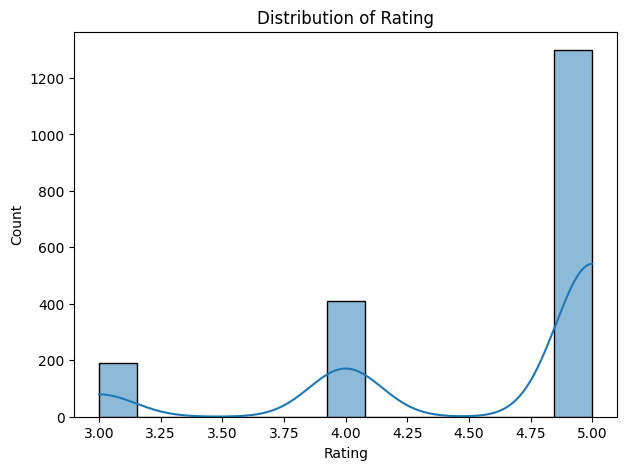

In [ ]:
# histogram for rating - Showing the distribution of the datapoints
plt.figure(figsize=(7, 5))  # size of the plot to display
sns.histplot(data=df, x="rating",kde=True)  # kde=True for kernel density estimate
plt.title('Distribution of Rating') #heading of the plot
plt.xlabel('Rating') # x-axis label
plt.show()




---


**Insight** :





* The histogram shows a distribution of ratings with a  peak at the rightmost end (rating 5.0).
* The data is left-skewed ( negatively skewed), indicating that the tail on the left side (lower ratings)
* The mode can be easily observed as the highest bar in the histogram.


---








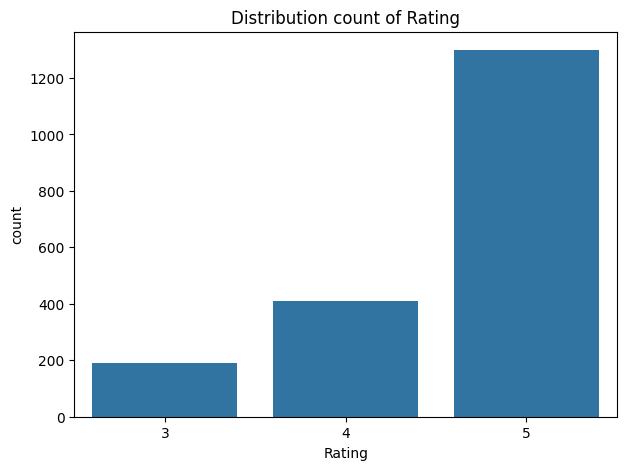

In [ ]:
#  countplot for rating - showing the count of individual rating
plt.figure(figsize=(7, 5)) # size of the plot to display
sns.countplot(x='rating', data=df)
plt.title('Distribution count of Rating') # heading of the plot
plt.xlabel('Rating') # x-axis label
plt.show()



---


**Insight**  :
*  For the rating column, a count plot will show  the number of times each unique rating was given by the customers.


---
---



#### > Cost of the order

**TARGET**
* Determine distribution type
* Determine the average (mean or median) cost of the orders.
*  Identify if any anomalies in cost exists

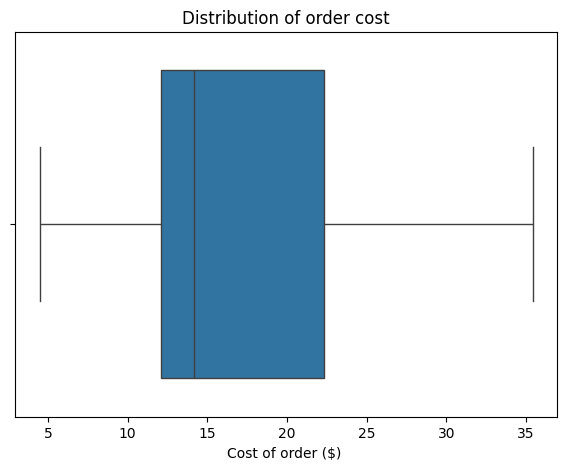

In [ ]:
# visualizing 'cost of the order' using Boxplot
plt.figure(figsize=(7, 5)) #size of the plot displayed
sns.boxplot(data=df, x="cost_of_the_order")
plt.title('Distribution of order cost') # heading of the plot
plt.xlabel('Cost of order ($) ') # x-axis label
plt.show()



---


**Insight :**
* Dissplaying the distribution of data based on a five-number summary:
    * minimum --  5$
    * first quartile (Q1) -- 12$
    * median -- 14$
    * third quartile (Q3) -- 22$
    *  maximum -- 35$
* IQR represts the variablity of datapoints
* The plot for cost_of_the_order   is **Left skewed**.
* The boxplot shows no outliers


---



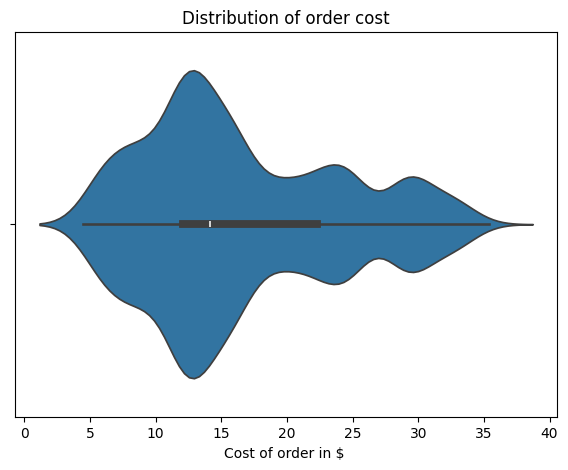

In [ ]:
# violin plot for cost of order for more detailed view
plt.figure(figsize=(7, 5)) #size of the plot displayed
sns.violinplot(data=df, x="cost_of_the_order")
plt.title('Distribution of order cost') # heading of the plot
plt.xlabel('Cost of order in $ ')  # x-axis label
plt.show()



---


**Insight :**

* Areas where the plot is wider represent higher densities of data points, i.e  more orders fall within that cost range.
* Peaks within the plot indicate that there are  common cost of the orders made (mode).
* The curve shows mostly order cost is around (12$)
* Unlike boxplot violin plot gives a insight on complete data


---
---



#### > Food preparation time

**TARGET**
* Determine the average (mean or median) preparation time of the orders.
* Identify if any anomalies in time taken for preparation.
* Identify the variablity in preparation time.
* Observe how often each order takes particular time span

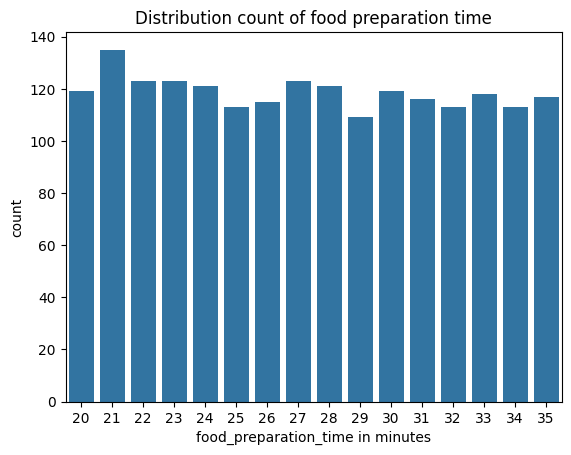

In [ ]:
# analysing food preparation time with countplot

sns.countplot(data=df,x='food_preparation_time');
plt.title('Distribution count of food preparation time') # heading of the plot
plt.xlabel('food_preparation_time in minutes') # x-axis label
plt.show()



---


**Insight :**
* The peak of the countplot show the most common preparation time (mode) -- 21 minutes

---


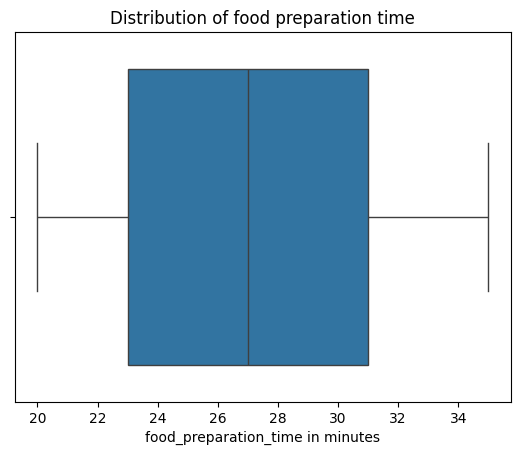

In [ ]:
# analysing  food preparation time with boxplot

sns.boxplot(data=df,x='food_preparation_time');
plt.title('Distribution of food preparation time') # heading of the plot
plt.xlabel('food_preparation_time in minutes');

---
**Insight :**
* Dissplaying the distribution of data based on a five-number summary:
    * minimum --  20 mins
    * first quartile (Q1) -- 23 mins
    * median -- 27 mins
    * third quartile (Q3) -- 31mins
    *  maximum -- 31 mins
  * The above plot for food preparation time shows Normally distribution
  * The boxplot shows there are no anomalies



---
---



#### > Deliver time

**TARGET**
* Determine the average (mean or median) delivery time of the orders.
*  Identify if any anomalies in time taken for the delivery of the orders exists
* Determine the distribution type

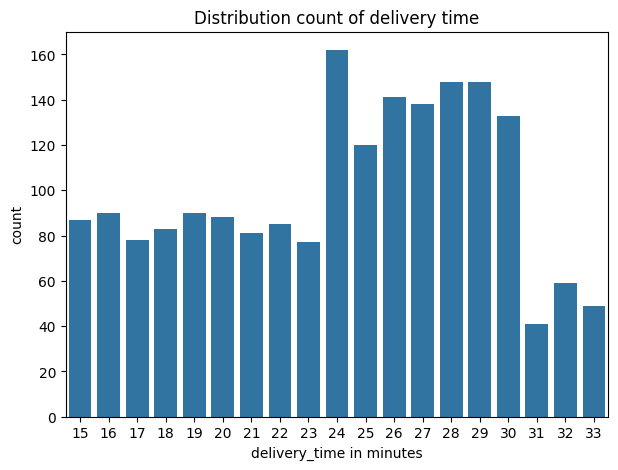

In [ ]:
# visualizing delivery time with countplot
plt.figure(figsize=(7, 5)) #size of the plot displayed
sns.countplot(data=df,x='delivery_time');
plt.title('Distribution count of delivery time') # heading of the plot
plt.xlabel('delivery_time in minutes') # x-axis label
plt.show()

---
**Insight :**
* The pot shows the mode with highest bar for the delivery time taken that is 24 minutes.
---

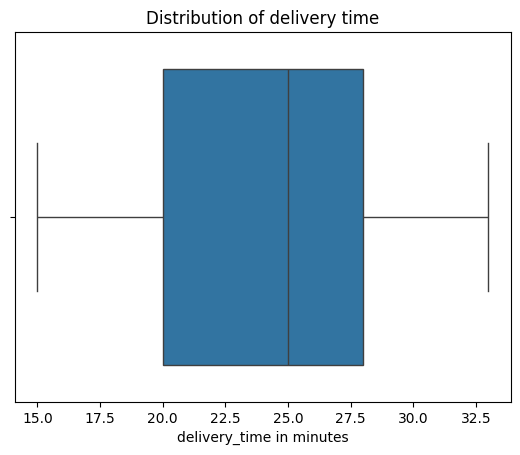

In [ ]:
# visualizing the delivery time datapoint summary with boxplot
sns.boxplot(data=df,x='delivery_time')
plt.title('Distribution of delivery time') # heading of the plot
plt.xlabel('delivery_time in minutes') #x-axis label
plt.show()

---
**Insight :**
*  Dissplaying the distribution of data based on a five-number summary:
    * minimum --  15 mins
    * first quartile (Q1) -- 20 mins
    * median -- 25 mins
    * third quartile (Q3) -- 28 mins
    *  maximum -- 33 mins
* The above plot for delivery time is Right skewed



---

---

#### > Customer wait time

* customer wait time is a combination of both food preparation time and delivery time.

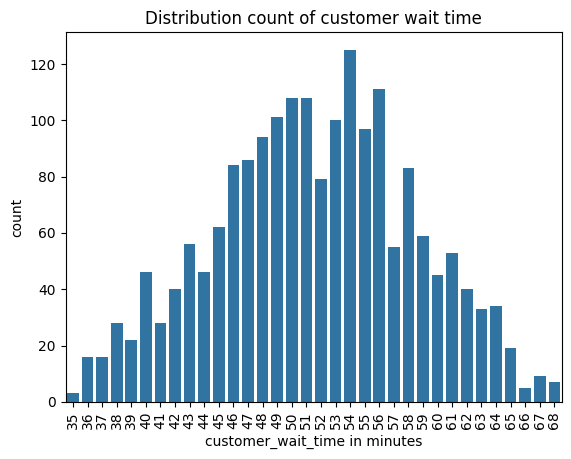

In [ ]:
#visualising total time a customer waits to receive order
sns.countplot(data=df,x='customer_wait_time');
plt.title('Distribution count of customer wait time') # heading of the plot
plt.xlabel('customer_wait_time in minutes'); # x-axis label
plt.xticks(rotation=90)
plt.show()

---
**Insight**

*  The pot shows the mode with highest bar for the customer wait time  that is 54 minutes.



---

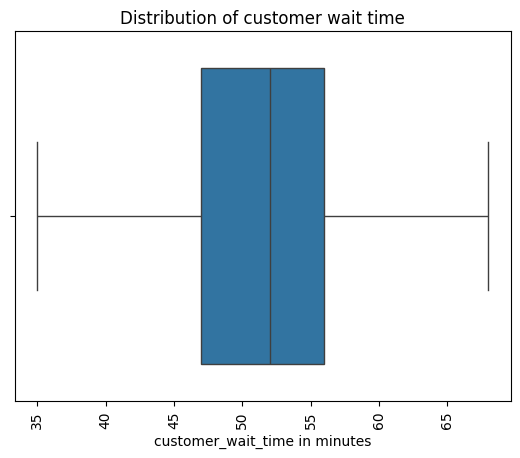

In [ ]:
# visualizing the distribution of data summary
sns.boxplot(data=df,x='customer_wait_time');
plt.xlabel('customer_wait_time in minutes');
plt.title('Distribution of customer wait time') # heading of the plot
plt.xticks(rotation=90)
plt.show()

---
**Insight**
* Dissplaying the distribution of data based on a five-number summary:
    * minimum --  35 mins
    * first quartile (Q1) -- 47 mins
    * median -- 52 mins
    * third quartile (Q3) -- 56 mins
    *  maximum -- 68 mins
* The above plot for customer wait time is slightly Right skewed
---

---



### Univariate Categorical Variables

*   customer_id
*   order_id

*   cuisine_type
* restaurant_name
* day_of_the_week

#### > customer_id

In [ ]:
# Total no.of unique ids alotted to the customers
df['customer_id'].nunique()


1200

In [ ]:
# No.of orders placed with each customer_id
df['customer_id'].value_counts()


customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: count, Length: 1200, dtype: int64

---
**Insight :**
* Customer id is unique id given to each customer when order is made .
* There are 1200 such unique ids aloted to customers
* The id ***52832*** has highest no.of  orders placed
* Analyzing this alone nothing can be inferred -- ignored
---
---

#### > order_id

In [ ]:
df['order_id'].nunique()

1898

---
**Insight :**
* Order id is unique id alotted for to each order made .
* There are a total of 1898 orders registered with unique ids alotted for each order.
* Analyzing this column alone nothing can be inferred -- ignored
---
---

#### > cuisine_type

**TARGET**
*  Identify the most ordered cuisine type.
* Determine how often each cuisine type is ordered.
* Determine if any rarely ordered cuisine types is present


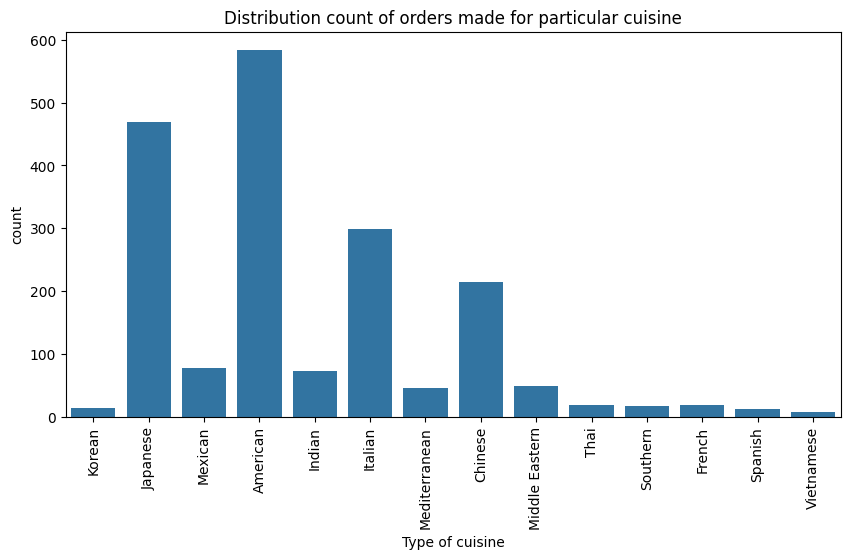

In [ ]:
# analyzing cuisine type  with countplot

plt.figure(figsize=(10, 5)) #size of the plot displayed
sns.countplot(x="cuisine_type", data=df)
plt.title("Distribution count of orders made for particular cuisine") # heading of the plot
plt.xlabel("Type of cuisine")   #x-axis label
plt.xticks(rotation=90)
plt.show()

---
**Insight**
* The above  plot shows
American cuisine is the most frequently ordered, followed by Japanese and Italian.
Chinese cuisine also shows a moderate level of popularity.
* vietnamese is rarely ordered cuisine type.
---
---

#### > day_of_the_week

**TARGET**
* Determine the percentage of orders on weekdays versus weekends.
* Count of orders on weekdays and weekends.
* Identify if any trends in ordering on weekdays and weekends.

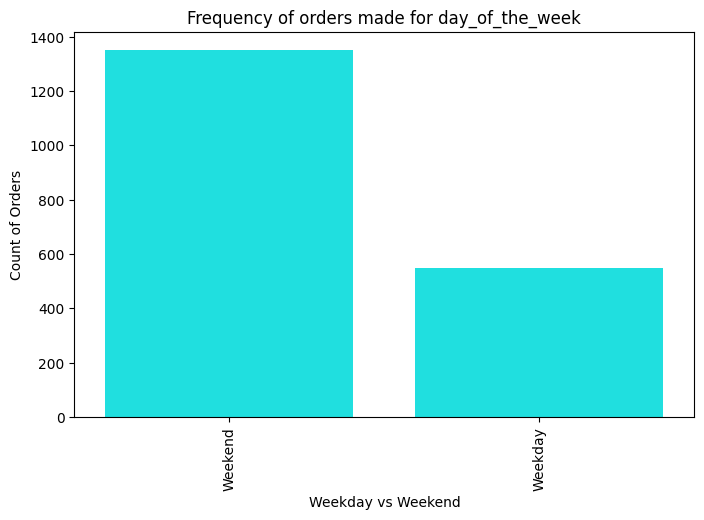

In [ ]:
#  analysis of categorical variable -day_of_the_week with countplot
plt.figure(figsize=(8, 5)) #size of the plot displayed
sns.countplot(x="day_of_the_week", data=df, color='aqua')
plt.title("Frequency of orders made for day_of_the_week") # heading of the plot
plt.xlabel("Weekday vs Weekend")   #x-axis label
plt.ylabel("Count of Orders")  #y-axis label
plt.xticks(rotation=90)
plt.show()

In [ ]:
#  percentage of orders on weekends

weekend_orders = df[df['day_of_the_week']=='Weekend']
total_orders = len(df)
percentage_weekend_orders = (len(weekend_orders) / total_orders) * 100
print("Percentage of orders on weekends:" ,round(percentage_weekend_orders),"%")

#  percentage of orders on weekdays

weekday_orders = df[df['day_of_the_week']=='Weekday']
total_orders = len(df)
percentage_weekday_orders = (len(weekday_orders) / total_orders) * 100
print("Percentage of orders on weekdays:" ,round(percentage_weekday_orders),"%")


Percentage of orders on weekends: 71 %
Percentage of orders on weekdays: 29 %


---
**Insight**

* The number of orders placed on weekends is more compared to that of weekdays
* Percentage of orders on weekends: 71 %
* Percentage of orders on weekdays: 29 %
---
---

#### > restaurant_name

**TARGET**
* Determine the most frequently ordered restaurant.
* count how often each restaurant appears.
* Determine if any restaurant is having  unusually high or low order counts.

In [ ]:
 # number of unique values in the 'restaurant_name' column of the DataFrame
df['restaurant_name'].nunique()

178

There are 178 restaurants that are registered i.e those reastaurant receive orders through food hub app.
These restaurants are in a way client to the Foodhub app

In [ ]:
# count of how many times each value occurs.
df['restaurant_name'].value_counts()

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: count, Length: 178, dtype: int64

---
**INSIGHT**


*   The above data shows that Shake shacks reastaurant has more number of orders as it appears most number of times followed by The meatball sho and Blue ribbon sushi.




---

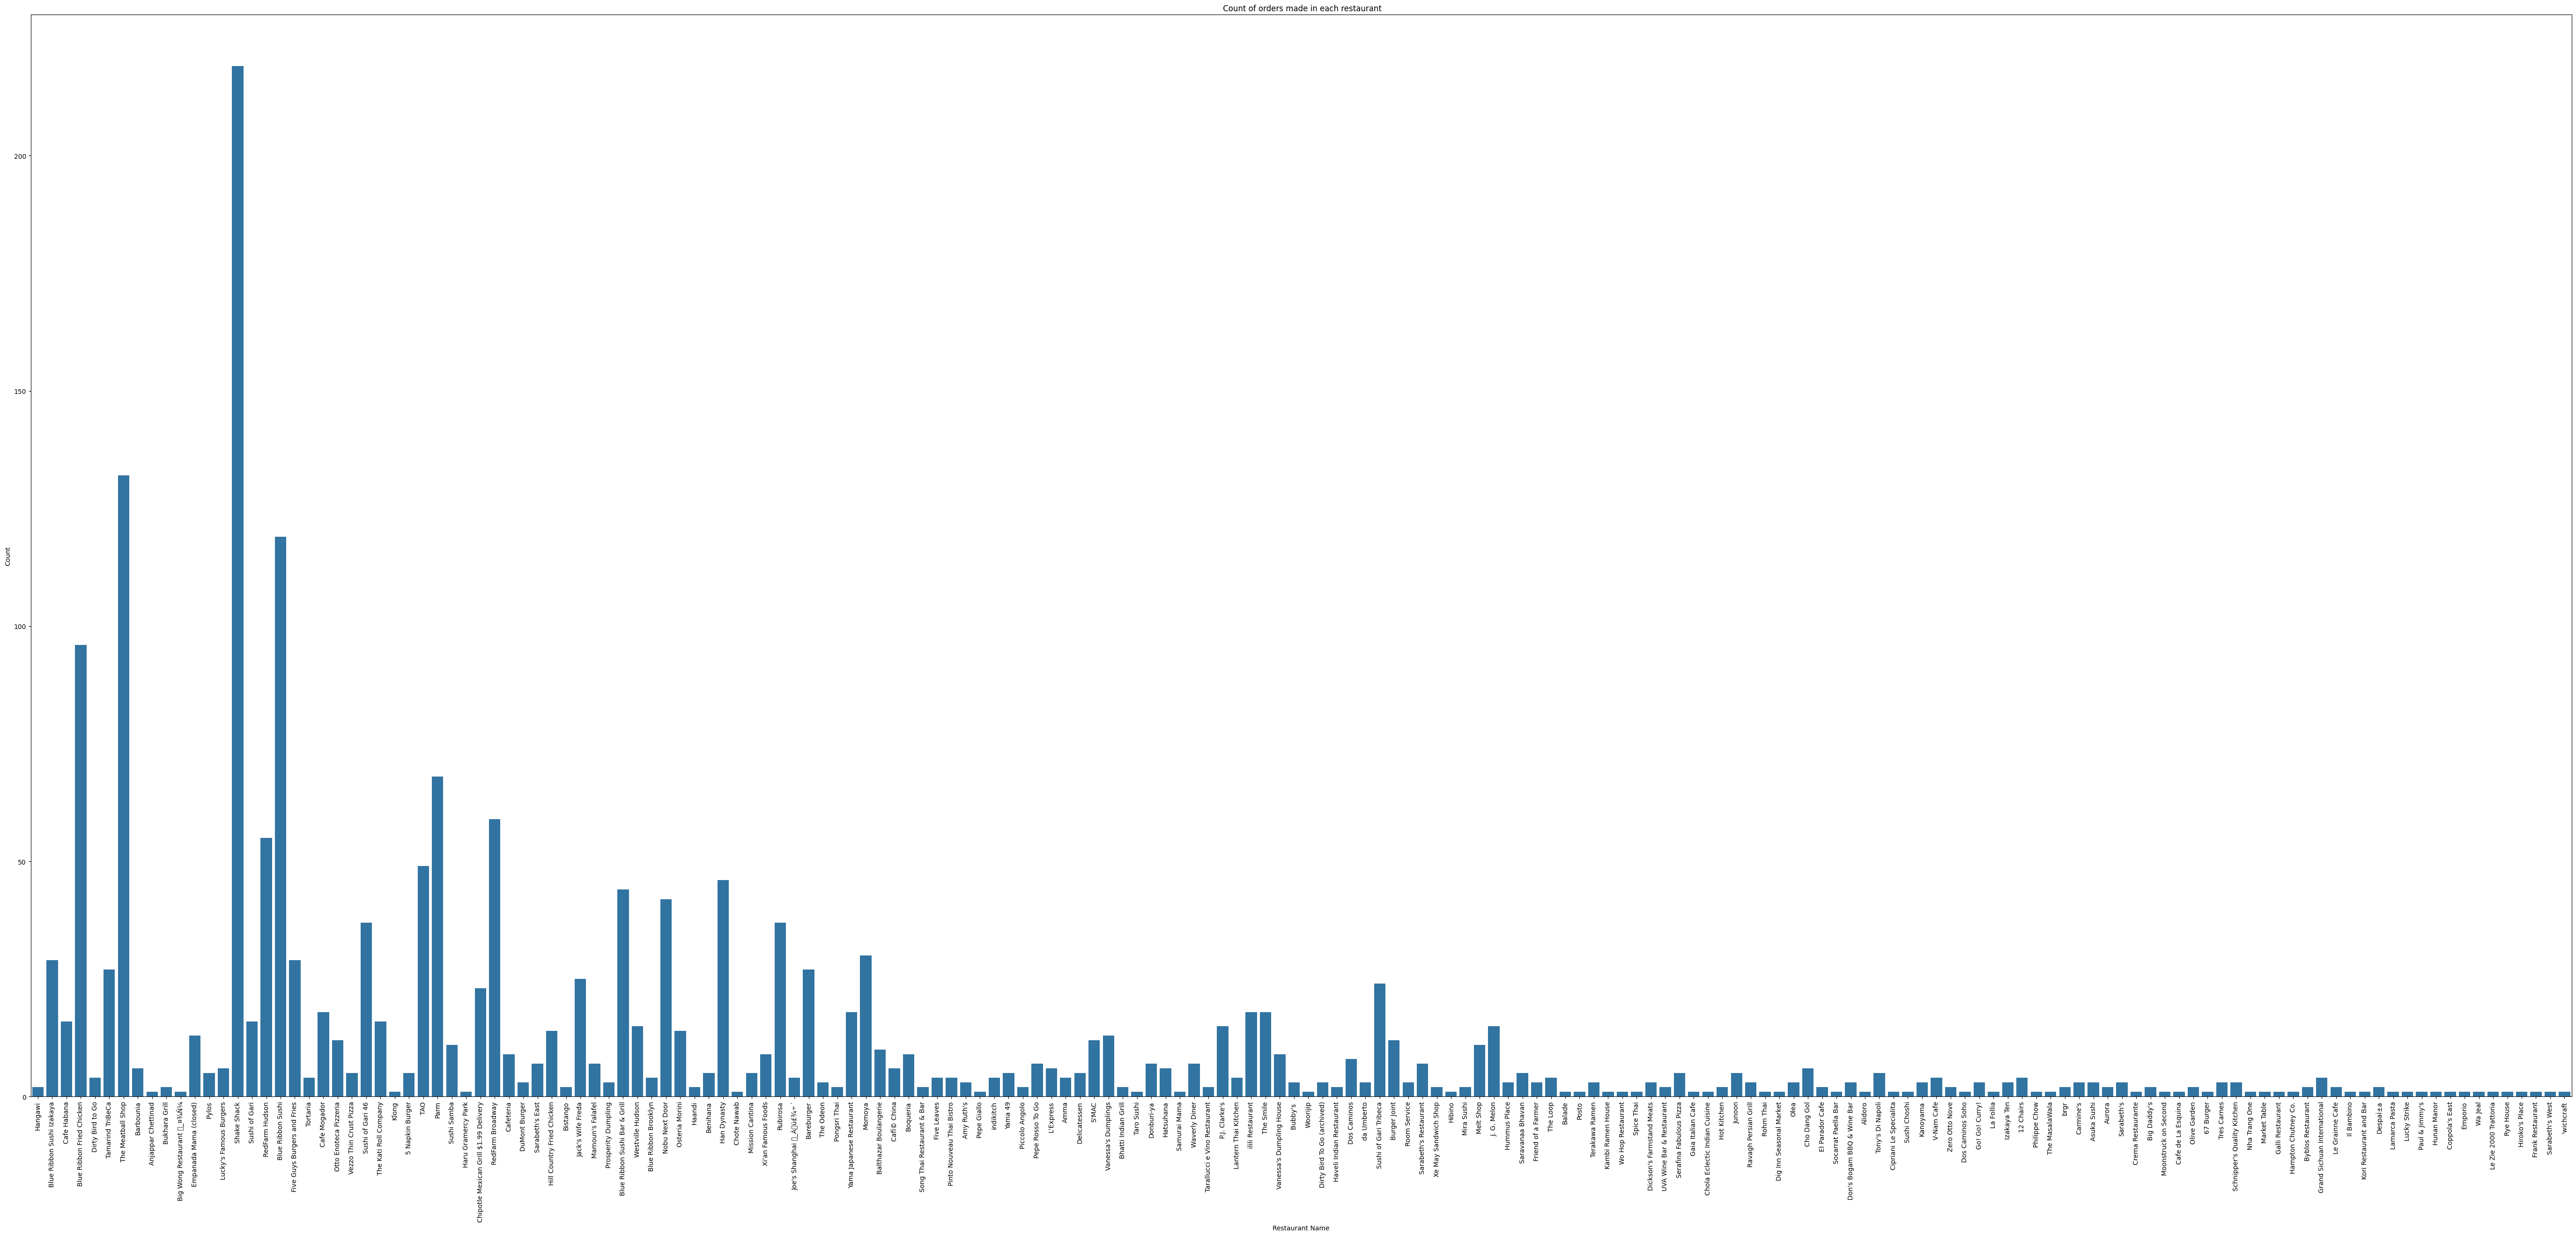

In [ ]:
# visualizing the count of orders made in restaurant_name column
plt.figure(figsize=(70, 30)) #size of the plot displayed
sns.countplot(x="restaurant_name", data=df)
plt.title(" Count of orders made in each restaurant") # heading of the plot
plt.xlabel("Restaurant Name")   #x-axis label
plt.ylabel("Count") #y-label
plt.xticks(rotation=90)
plt.show()

---
**Insight**


*   The above plot shows count of the orders received by each restaurant  in restaurant_name column

---

# Question 7:
Which are the top 5 restaurants in terms of the number of
orders received? [1 mark]


In [ ]:
#the top 5 restaurants in terms of the number of orders received
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

---
**Insight**

Top five restaurants
* Shake Shack           -----       219
* The Meatball Shop    -----        132
* Blue Ribbon Sushi      -----      119
* Blue Ribbon Fried Chicken    ----- 96
* Parm           -----               68
---

# Question 8:
Which is the most popular cuisine on weekends? [1 mark]

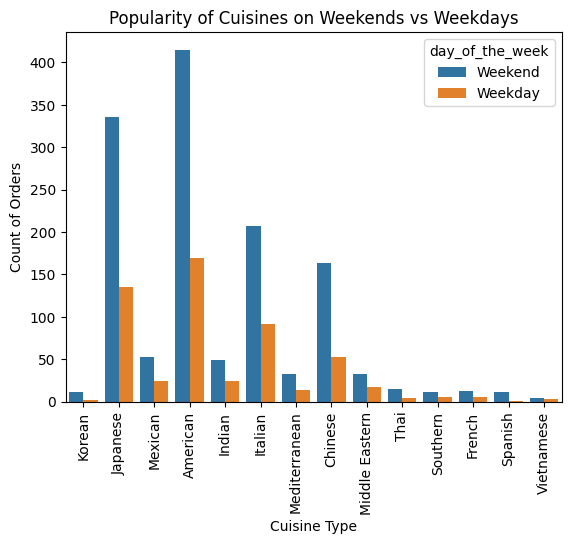

In [ ]:
# visualizing which cuisine is popular on weekend(saturday and sunday)
sns.countplot(x='cuisine_type',data=df,hue='day_of_the_week')
plt.xticks(rotation=90)  # rotating the x-axis labels for better readability
plt.title('Popularity of Cuisines on Weekends vs Weekdays') # heading of the plot
plt.xlabel('Cuisine Type') # x-axis label
plt.ylabel('Count of Orders') # y-axis label
plt.show()

---
**Insight**
* AMERICAN CUISINE is most popular on weekends
* American cuisine is most popular on weekdays as well when compared to other cuisines followed by Japanese cuisine.
---

# Question 9:
What percentage of the orders cost more than 20 dollars?
[2 marks]

In [ ]:
# Percentage of orders with cost_of_the_order more than 20$

total_no_of_orders = len(df) #length of the df
orders_above_20 = len(df[df['cost_of_the_order'] > 20]) #length of orders with cost > 20$
percentage = (orders_above_20/ total_no_of_orders) * 100 # calculating percentage of orders with cost > 20$
print('Percentage of orders with cost more than 20$ = ', round(percentage,2),"%")


Percentage of orders with cost more than 20$ =  29.24 %


---
**Insights**


*   Percentage of orders with cost more than 20$ =  29.24 %


---






# Question 10:
 What is the mean order delivery time? [1 mark]

In [ ]:
# checking the average delivery time taken
mean_delivery_time=df['delivery_time'].mean()
print(round( mean_delivery_time ,2 ))

24.16


---
**Insights**


*   Mean of delivery_time is 24.16 minutes





---

# Question 11:
The company has decided to give 20% discount vouchers
to the top 3 most frequent customers. Find the IDs of these customers
and the number of orders they placed. [1 mark]

In [ ]:
# Finding the Ids of top-3 customers and number of orders placed by them
customer_order = df['customer_id'].value_counts() # count of orders for each customer
top_3_customers=customer_order.head(3) # top 3 customers
print(top_3_customers)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64


In [ ]:
# creating 2 columns for better display and readability
top_customers_for_discount = top_3_customers.reset_index() # converting the series to dataframe
top_customers_for_discount.columns = ['customer_id', 'order_count'] # renaming the columns
top_customers_for_discount

customer_id  order_count
0       52832           13
1       47440           10
2       83287            9

---
**Insight**
*  Top 3 most frequent customers eligible for 20% discount vouchers
 * ***custome-ids and no.of orders place***

    * 1-	52832 ----	13
    * 2-	47440 ----	10
    * 3-	83287 ----	9
---

# Multivariate Analysis

---



# Question 12:
Perform a multivariate analysis to explore relationships
between the important variables in the dataset. (It is a good idea to
explore relations between numerical variables as well as relations
between numerical and categorical variables) [10 marks]


### Bivariate numerical analysis


#### **Heatmap of Numerical Variables**

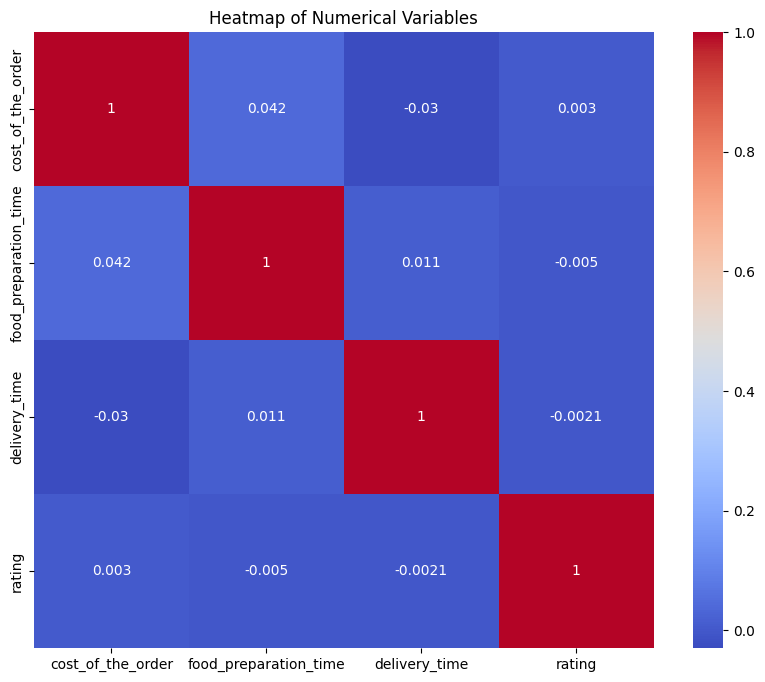

In [ ]:
# Creating a heatmap of the numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['cost_of_the_order', 'food_preparation_time','delivery_time', 'rating']].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Variables')
plt.show()


---
**Insight**

* The heatmap showing correlation between numerical variables indicates that there is no strong correlation between any numerical variables.
* There is negative correlation between:
    * 1.cost_of_the_order vs delivery_time
    * 2.food_preparation_time vs rating
    * 3.delivery_time vs rating
* The negatively correlated pairs imply that increase in one variable results in decrease in the other
* Point no. 2 and 3 being correlated negatively is justified as considering the time span
     * increase in food_preparation_time ,decrease in rating or vise-versa
     * increase in delivery_time ,decrease in rating or vise-versa
* Point no.1 needs to be drilled as it states cost_of_the_order increases , delivery_time decreases or vise-versa
* customer_oder_time column is ignored as it is resultant of food_preparation_time and delivery_time and would show a strong correlation only with these two variables.
---

##### Itemization (cost of order vs delivery time)

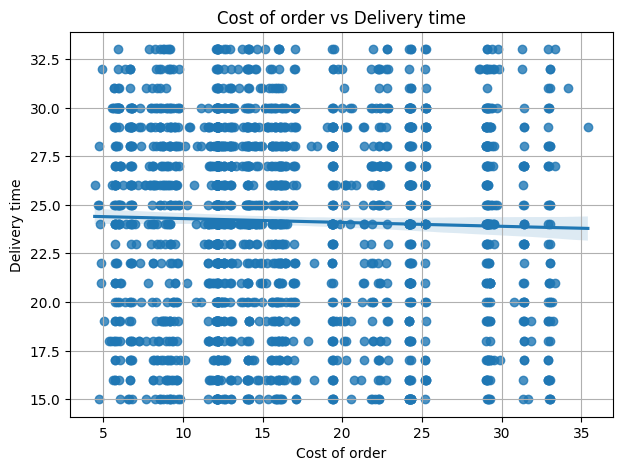

In [ ]:
# Analyzing the relation between cost of order and  delivery time
plt.figure(figsize=(7, 5)) #size of the plot displayed
sns.regplot(x='cost_of_the_order', y='delivery_time', data=df)
plt.title('Cost of order vs Delivery time') # heading of the plot
plt.xlabel('Cost of order') # x-axis label
plt.ylabel('Delivery time') # y-axis label
plt.grid(True)
plt.show()

---
**Insight**
* The line of best fit  indicates the overall direction and strength of the relationship between the two variables
* The line of best fit is neigther up from left to right nor reversely slanted it is almost horizontal.
* There is no relationship between the two variables
* Cost of the order is not significatly impacting the delivery time in this case
---

#### customer_wait_time---Vs---cost_of_the_order

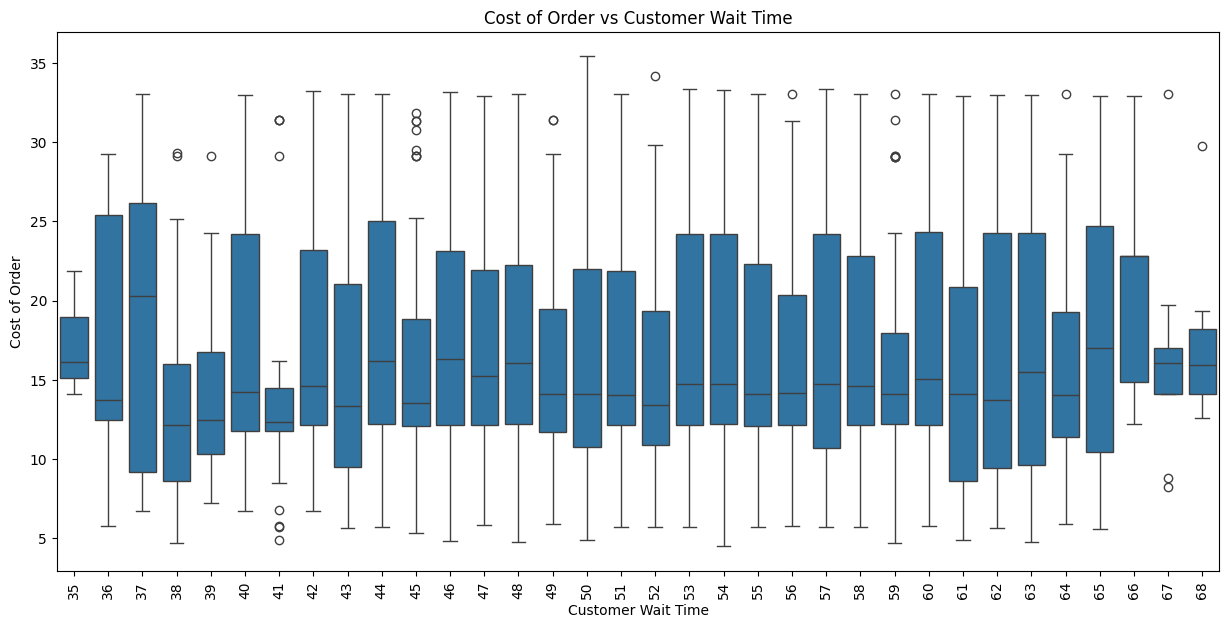

In [ ]:
# visualizing boxplot of cost of order and customer waiting time
plt.figure(figsize=(15, 7)) #size of the plot displayed
sns.boxplot(x="customer_wait_time", y="cost_of_the_order", data=df)
plt.title("Cost of Order vs Customer Wait Time") # heading of the plot
plt.xlabel("Customer Wait Time") # x-axis label
plt.xticks(rotation=90)
plt.ylabel("Cost of Order") # y-axis label
plt.show()

---
**Insight**
* The ouliers show unsual low or high in total waiting time for orders with respect to their cost
* Median showing average total waiting time with respect to cost of the order
---

### Bivariate categorical analysis

#### **restaurant_name---Vs---day_of_the_week**

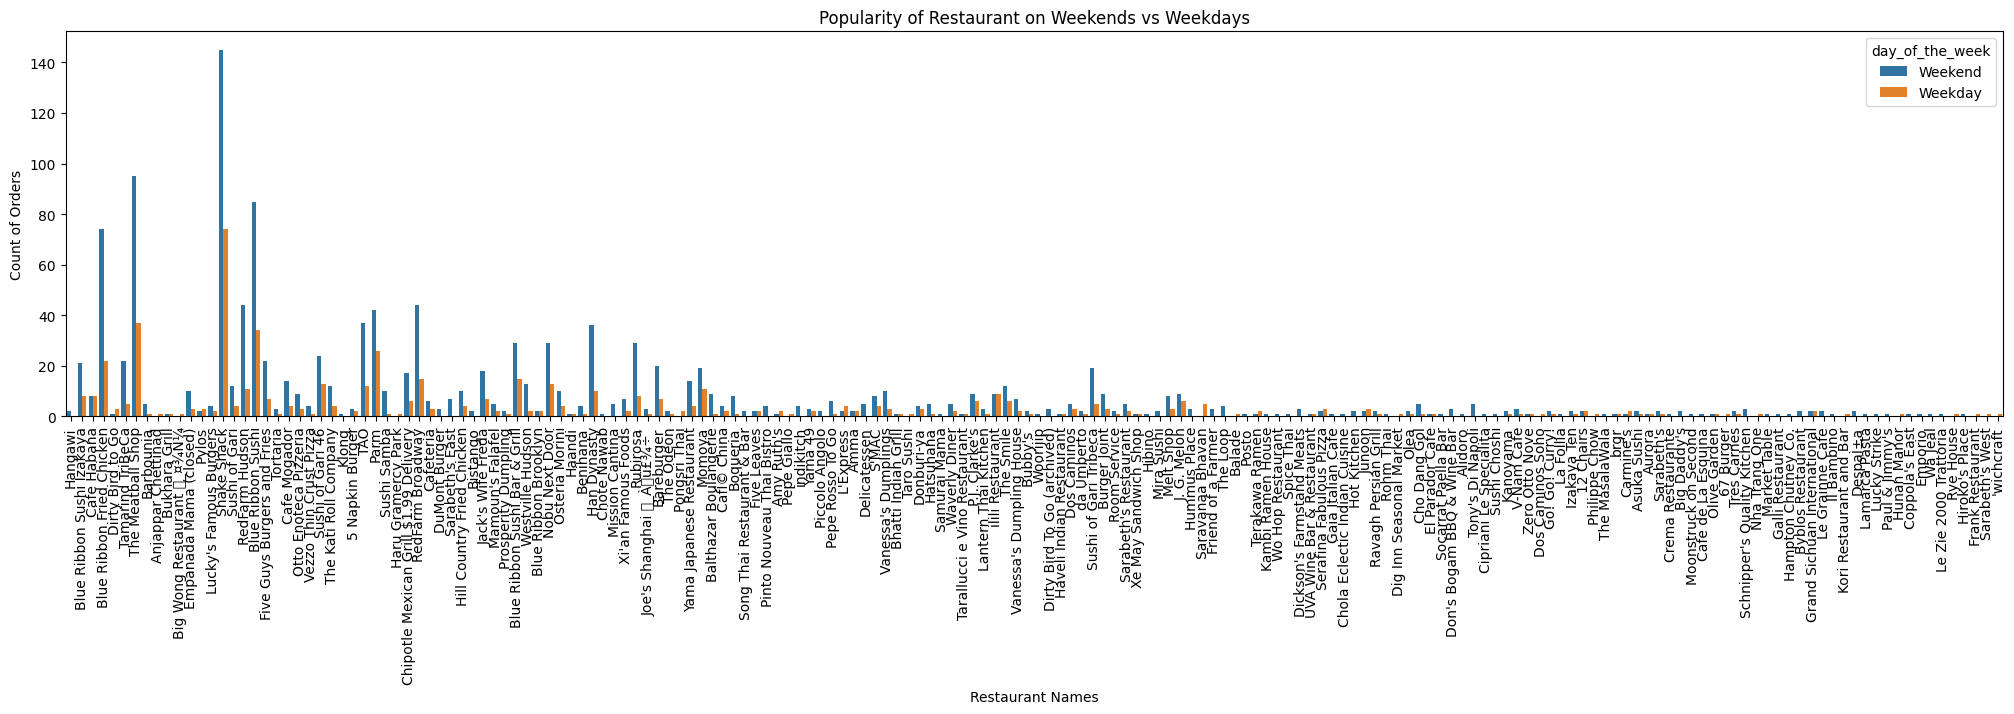

In [ ]:
# analysizing the orders each reasturant gets on weekdays and weekends
plt.figure(figsize=(25, 5)) #size of the plot displayed
sns.countplot(x='restaurant_name',data=df,hue='day_of_the_week')
plt.xticks(rotation=90)  # rotating the x-axis labels for better readability
plt.title('Popularity of Restaurant on Weekends vs Weekdays') # heading of the plot
plt.xlabel('Restaurant Names') # x-axis label
plt.ylabel('Count of Orders') #number of orders for each restaurant
plt.show()

---
**Insight**

* The plot shows most restaurants have there orders more on weekends when compared to weekdays .
* There are very few restaurants which have orders only on weekends or weekday only.
---

#### **cuisine_type---Vs---day_of_the_week**

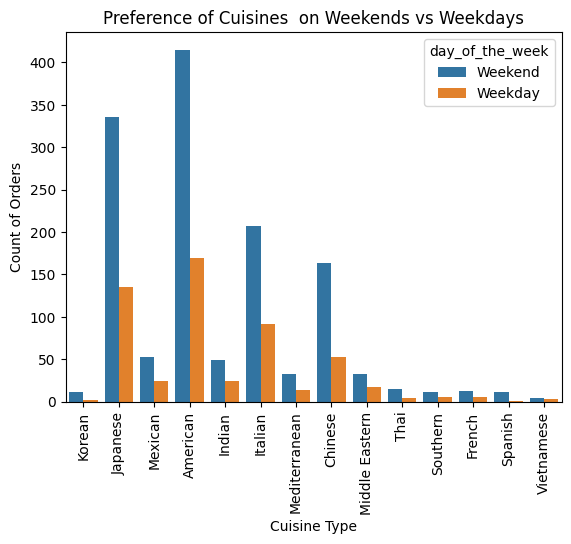

In [ ]:
# Analysizing cuisine preference depending of day_of_the_week
sns.countplot(x='cuisine_type',data=df,hue='day_of_the_week')
plt.xticks(rotation=90)  # rotating the x-axis labels for better readability
plt.title('Preference of Cuisines  on Weekends vs Weekdays') # heading of the plot
plt.xlabel('Cuisine Type') #x-axis label
plt.ylabel('Count of Orders') #y-label
plt.show()

---
**Insight**
* AMERICAN CUISINE is most popular on weekends
* American cuisine is most popular on weekdays as well when compared to other cuisines ,followed by Japanese cuisine.
* All cuisines have individually more orders on weekends when compared to their sale on weekdays
---


### Bivariate analysis between Numerical variables and categorical varaiables

##### **cost_of_the_order---VS---cuisine_type**

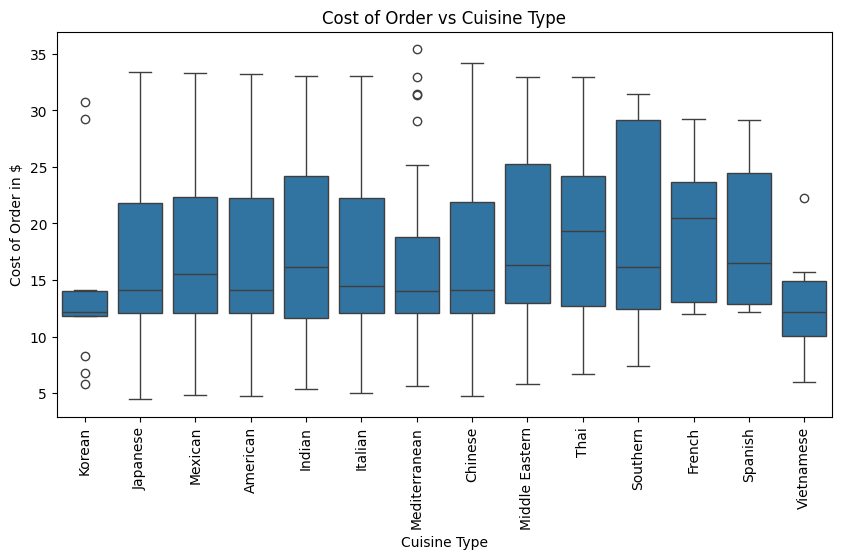

In [ ]:
# Visualizing boxplot of cost of order and cuisine type

plt.figure(figsize=(10, 5)) #size of the plot displayed
sns.boxplot(x="cuisine_type", y="cost_of_the_order", data=df)
plt.title("Cost of Order vs Cuisine Type")  # heading of the plot
plt.xlabel("Cuisine Type") # x-axis label
plt.xticks(rotation=90)
plt.ylabel("Cost of Order in $") # y-axis label
plt.show()


---
**Insights**
* The outliers in the plot indicate unusually high or low cost_of_the_orders specifically within each cuisine type
* Median in the plot indicating average cost of order within each cuisine type category.
* The most ordered cuisine in the dataset American cuisine has an averge cost around 14$
* The above plot shows the variations in the average cost billed on each cuisine type and other spread of the datapoints lying in IQR
---






##### **rating---Vs---cuisine_type**

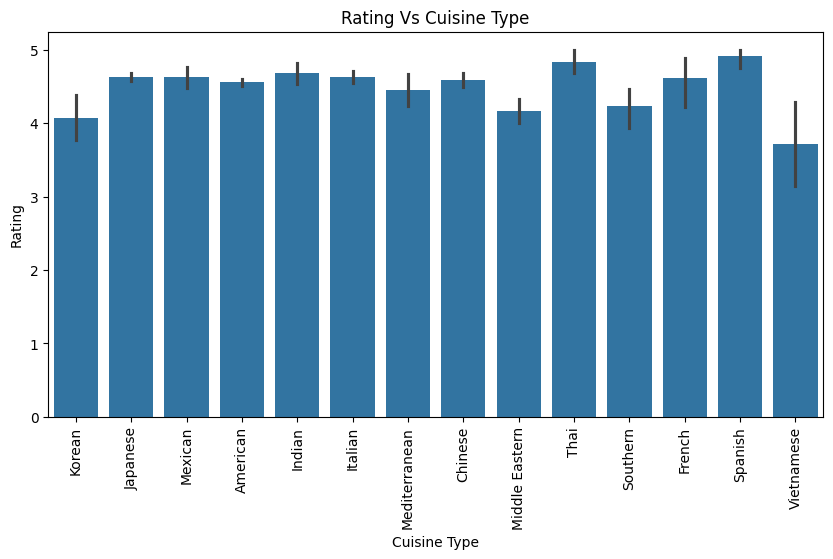

In [ ]:
# Visualizing barplot of rating and cuisine type

plt.figure(figsize=(10, 5)) #size of the plot displayed
sns.barplot(x="cuisine_type", y="rating", data=df)
plt.title("Rating Vs Cuisine Type")  # heading of the plot
plt.xlabel("Cuisine Type") # x-axis label
plt.xticks(rotation=90)
plt.ylabel("Rating") # y-axis label
plt.show()


---
**Insight**
* Each bar represents the count of ratings for orders of specific cuisine type.
* It provides insights into how customers rate their orders across different cuisine types.
* Rating not below 3 implies there are no extremely dissatisfied customers
---

##### **customer_wait_time---Vs---day_of_the_week**.

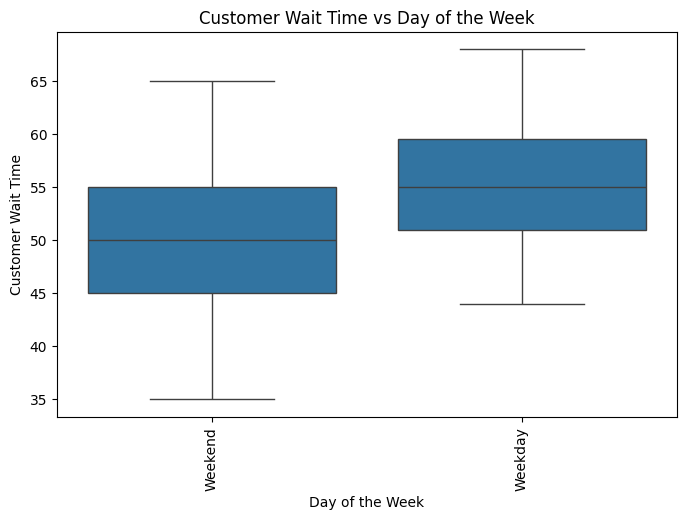

In [ ]:
# visualizing Boxplot of customer_wait_time vs. day_of_the_week.
plt.figure(figsize=(8, 5)) #size of the plot displayed
sns.boxplot(x="day_of_the_week", y="customer_wait_time", data=df)
plt.title("Customer Wait Time vs Day of the Week")  # heading of the plot
plt.xlabel("Day of the Week") # x-axis label
plt.xticks(rotation=90)
plt.ylabel("Customer Wait Time") # y-axis label
plt.show()

---
**Insight**
* The average waiting time a customer has to wait for orders made on weekdays is more than the average waiting time on weekends.
* This might be cause of special delivery personnels hired , restaurants operational system on weekends being different on weekends, traffic constraints etc
---

#####  **food_preparation_time---Vs---cuisine_type**.

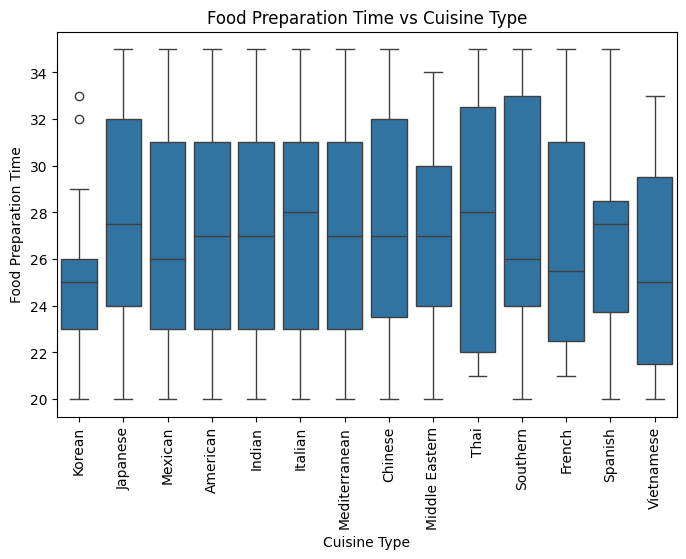

In [ ]:
# visualizing Boxplot of food_preparation_time vs. cuisine_type.
plt.figure(figsize=(8, 5)) #size of the plot displayed
sns.boxplot(x="cuisine_type", y="food_preparation_time", data=df)
plt.title("Food Preparation Time vs Cuisine Type")  # heading of the plot
plt.xlabel("Cuisine Type") # x-axis label
plt.xticks(rotation=90)
plt.ylabel("Food Preparation Time") # y-axis label
plt.show()

---
**Insight**

* The plot shows an average time taken for preparation of particular type of cuisine when order is placed.
* The outliers show the unusually high or low time taken in food preparation .
* The whiskers representing the Minimum and Maximum time taken for preparation of particular cuisine type
---

##### **cuisine_type---Vs--- customer waiting time**

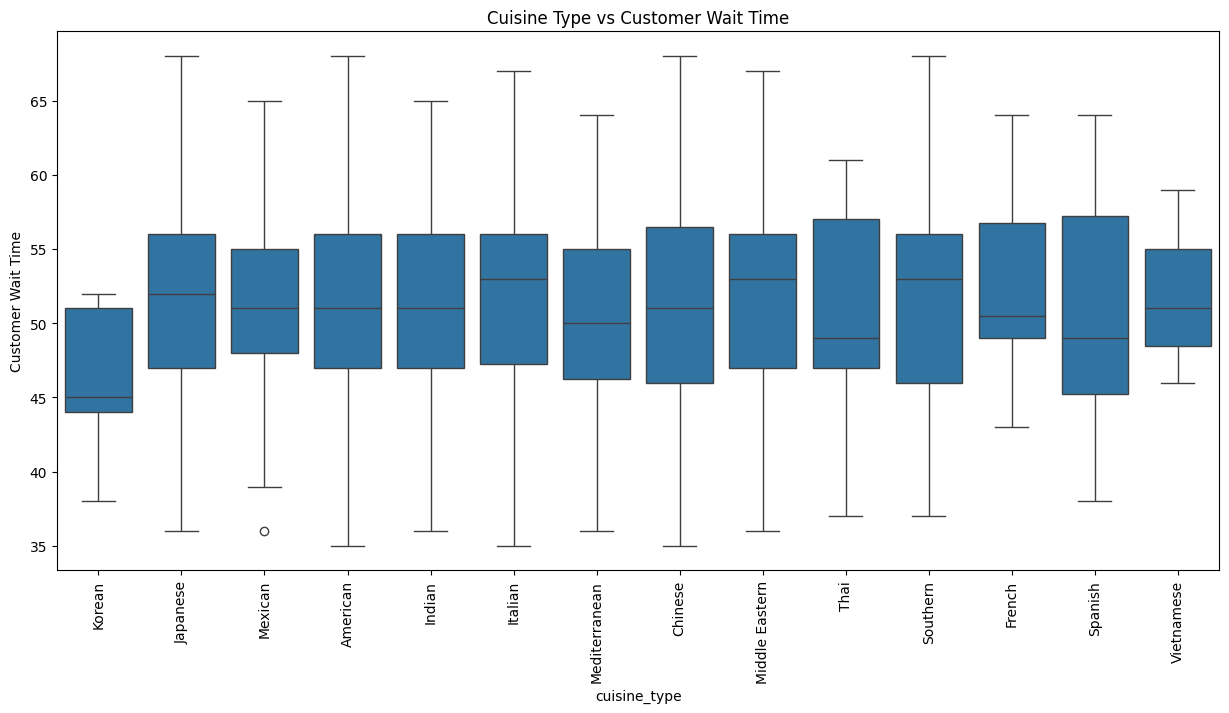

In [ ]:
# visualizing boxplot of cuisine and customer waiting time
plt.figure(figsize=(15, 7)) #size of the plot displayed
sns.boxplot(y="customer_wait_time", x="cuisine_type", data=df)
plt.title("Cuisine Type vs Customer Wait Time") # heading of the plot
plt.ylabel("Customer Wait Time") # x-axis label
plt.xticks(rotation=90)
plt.xlabel("cuisine_type") # y-axis label
plt.show()

---
**Insight**
* The ouliers show unsual low or high in total waiting time for orders with respect to the cuisine ordered
* Median showing average total waiting time with respect to cuisine type ordered
---

#### **food_preparation_time---Vs---day_of_week**


In [ ]:
# visualizing boxplot of food_preparation_time and day_of_the_week
plt.figure(figsize=(8,5)) #size of the plot displayed
sns.boxplot(y="day_of_the_week", x="food_preparation_time", data=df)
plt.title("food preparation time vs day_of_the_week") # heading of the plot
plt.ylabel("day of the week") # y-axis label
plt.xticks(rotation=90)
plt.xlabel("food preparation time") # x-axis label
plt.show()

---
**Insight**
* The plot shows that median time of the order on weekday is around same as that of weekend.
* This might be as a result of time for preparing the food being stable irrespective to day of the week,and no.of orders (weekends have more orders)yet they are managed by the restaurants
---


#### **cuisine_type---Vs---delivery_time**


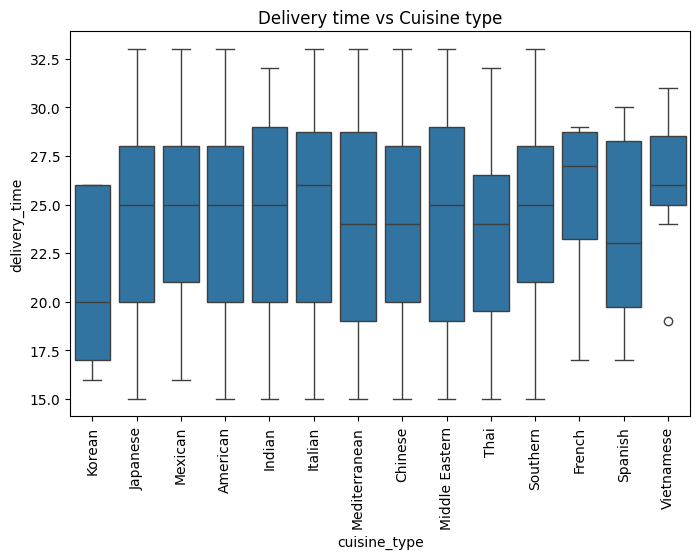

In [ ]:
# visualizing boxplot of delivery_time and cuisine type
plt.figure(figsize=(8,5)) #size of the plot displayed
sns.boxplot(y="delivery_time", x="cuisine_type", data=df)
plt.title("Delivery time vs Cuisine type") # heading of the plot
plt.ylabel("delivery_time") # y-axis label
plt.xticks(rotation=90)
plt.xlabel("cuisine_type") # x-axis label
plt.show()

---
**Insight**
* The outliers show unusual  hig or low in time taken for the delivery of the orfder
* The median showing the average time taken for the delivery personal to delivery a particualr cuisine type .
---


#### **day_of_the_week---Vs---delivery_time**

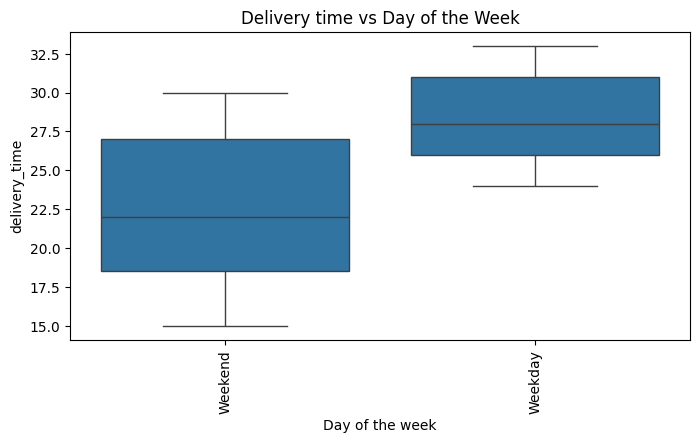

In [ ]:
# visualizing boxplot of delivery_time and cuisine type
plt.figure(figsize=(8,4)) #size of the plot displayed
sns.boxplot(y="delivery_time", x="day_of_the_week", data=df)
plt.title("Delivery time vs Day of the Week") # heading of the plot
plt.ylabel("delivery_time") # y-axis label
plt.xticks(rotation=90)
plt.xlabel("Day of the week") # x-axis label
plt.show()

---
**Insight**
* The time median time take for delivery on weekend is less compared to that of delivery time taken to deliver on weekdays.
* This typical behaviour might be cause of  traffic conditions, operational methods on weekends, customer availability, more delivery personnels in operation specifically for weekends etc
---

### Multivariate analysis

##### 1. **`cost_of_the_order` vs. `customer_wait_time` vs. `cuisine_type`**


**TARGET:**
* Plot between these variables will show how order cost is related to customer total time waiting wait , with regards to cuisine types
* The plot will show if certain cuisine type generally has  longer waiting times and higher cost of order

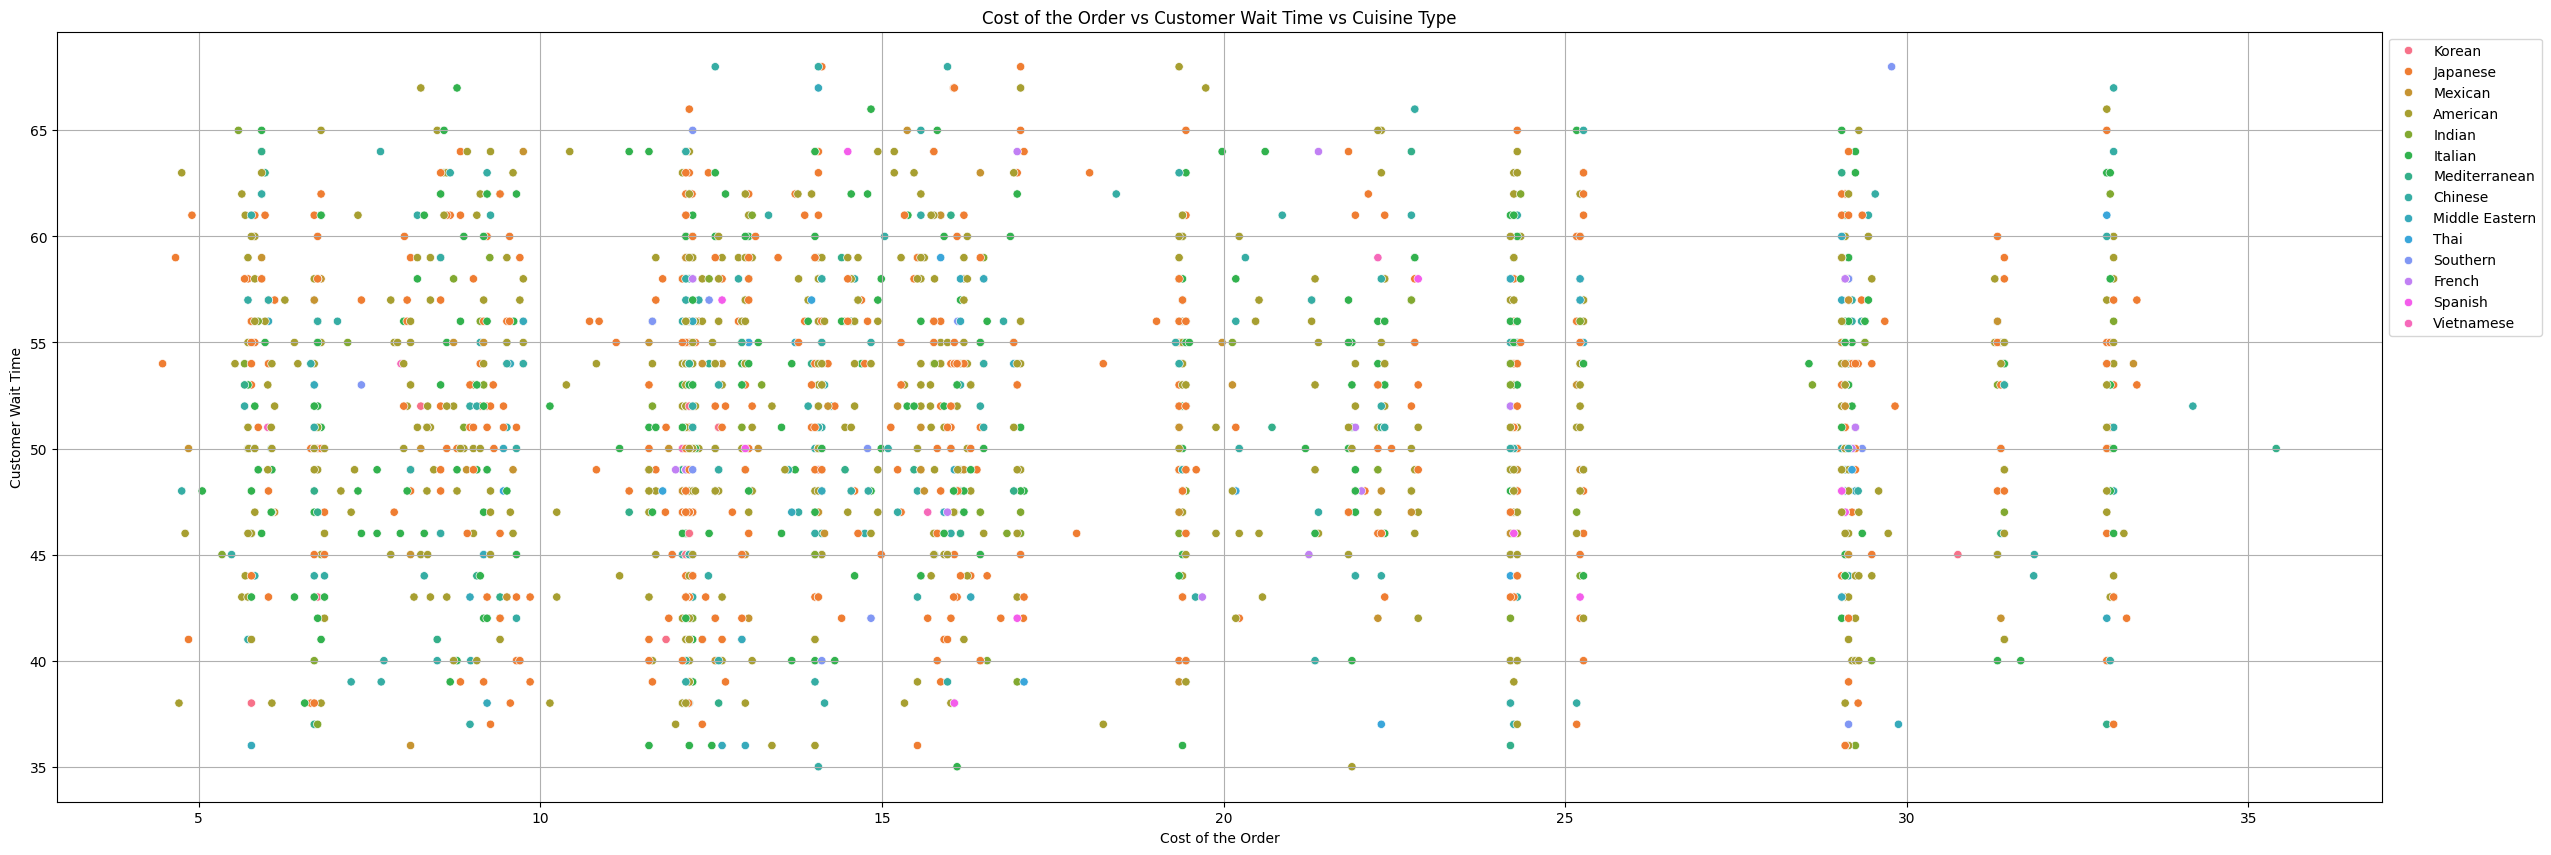

In [ ]:
# Analyzing using scatterplot
plt.figure(figsize=(30, 10)) #size of the plot displayed
sns.scatterplot(x="cost_of_the_order", y="customer_wait_time", hue="cuisine_type", data=df)
plt.title("Cost of the Order vs Customer Wait Time vs Cuisine Type") # heading of the plot
plt.xlabel("Cost of the Order") # x-axis label
plt.ylabel("Customer Wait Time") # y-axis label
plt.legend(title="Cuisine Type")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

* The scatterplot being clusttered and hard to understand or draw any insight .
* Considering a random sample ensuring  that the random numbers generated when run a piece of code multiple times can get the same results each time so  collaborators can verify results When  code is shared with others and they can reproduce the same results.



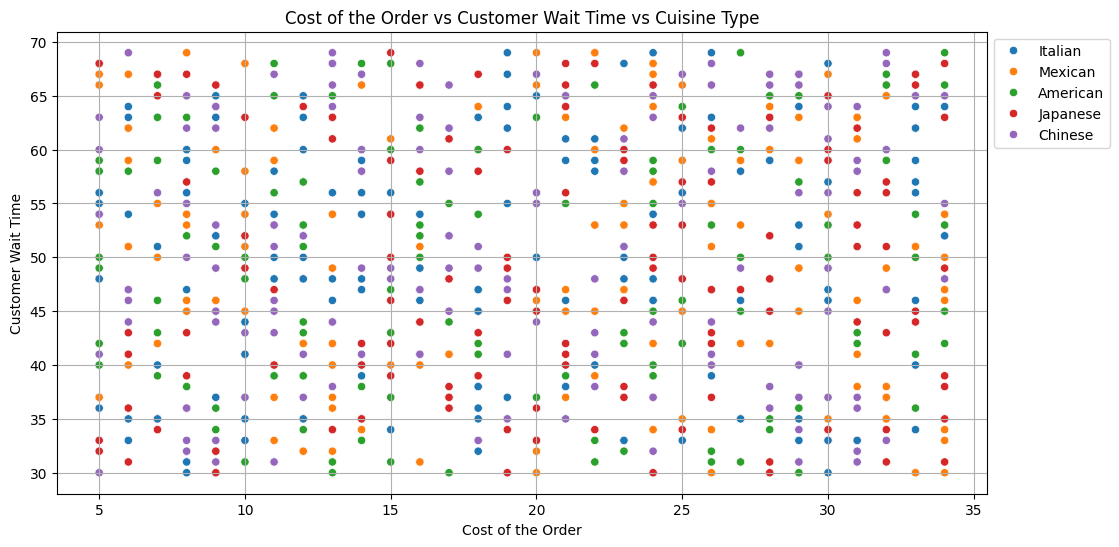

In [ ]:
# As from method of sampling suggested on COMMUNITY BLOCK of dashboard
# Making a Sample DataFrame for understanding the plot from above which is clustered
np.random.seed(0)  #random numbers generated that are reproducible
data = {"cost_of_the_order": np.random.randint(5, 35, 800), #sample size of 800
    "customer_wait_time": np.random.randint(30, 70, 800),
    "cuisine_type": np.random.choice(['American','Japanese','Italian','Chinese','Mexican' ], 800)} #considering top 5 restaurants
sample_df = pd.DataFrame(data) # new sameple dataframe

plt.figure(figsize=(12, 6)) #size of the plot displayed
sns.scatterplot(x="cost_of_the_order", y="customer_wait_time", hue="cuisine_type", data=sample_df,) #making a plot for sample for sample
plt.title("Cost of the Order vs Customer Wait Time vs Cuisine Type")
plt.xlabel("Cost of the Order") # x-axis label
plt.ylabel("Customer Wait Time") # y-axis label
plt.legend(title="Cuisine Type") # legend box title
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # adjusting the legend box out of plot for readability
plt.grid(True) #grid view for easy understanding of placement of datapoints
plt.show()


---
**Insights**
* The cluster in the first plot shows concentrain of datapoints
* Visualizing sample of data, there is no particular cuisine type that is effecting the waiting period or cost of order considering the distribution of points.
* Cost of order for all cuisine type not showing much variation might be no much difference in cost charged between cuisine types or efficient working staff preparaing and delivering all types in same time which might be reason for not effecting the customer waiting time.
---

##### 2. **`rating` vs. `cost_of_the_order` vs. `cuisine_type`**



**TARGET**
* Check the impact of cost of order and cuisne type on rating giving by the customer

In [ ]:
# Analyzing using scatterplot
plt.figure(figsize=(30, 10)) #size of the plot displayed
sns.scatterplot(x="cost_of_the_order", y="rating", hue="cuisine_type", data=df)
plt.title("Cost of the Order vs Rating vs Cuisine Type") # heading of the plot
plt.xlabel("Cost of the Order") # x-axis label
plt.ylabel("rating") # y-axis label
plt.legend(title="cuisine type")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

---
**Insight**
* The rating given by the customer is neither impacted by the cost of the order nor impacted by the cuisine type as the plot shows.
* This maybe other factors like quality of food or taste etc basing on which the rating might have been given by customers as per plot neither cost nor type of cuisine is impacting and also shows all kind of cuisines served have a minimum of 3 rating with zero extremely dissatisfied customers.
---

##### 3. **`food_preparation_time` vs. `cost_of_the_order` vs. `cuisine_type`**


**TARGET**
* check if preparation time and cost relate depending upon cuisine type
* check if any cuisine type having unusually high or low preparation time or cost




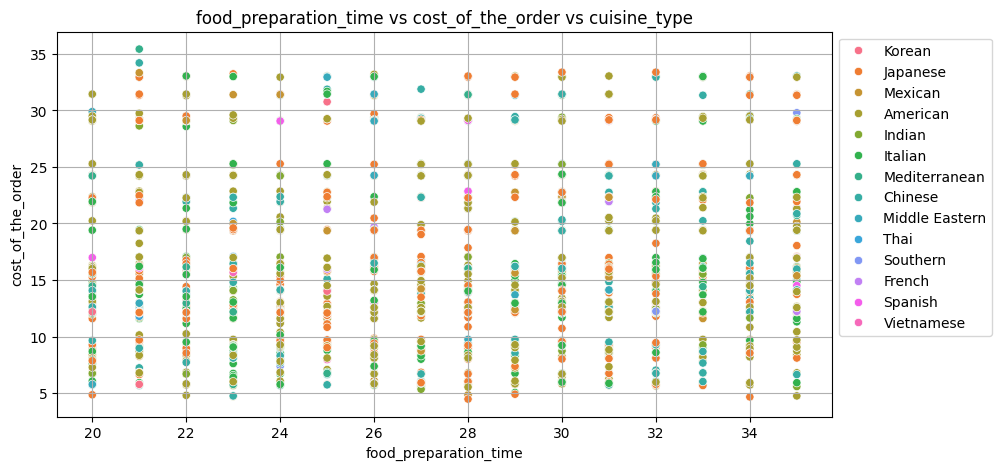

In [ ]:
#Analyzing using boxplot
plt.figure(figsize=(10, 5)) #size of the plot displayed
sns.scatterplot(x="food_preparation_time", y="cost_of_the_order", hue="cuisine_type", data=df)
plt.title("food_preparation_time vs cost_of_the_order vs cuisine_type") # heading of the plot
plt.xlabel("food_preparation_time") # x-axis label
plt.ylabel("cost_of_the_order") # y-axis label
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # adjusting the legend box out of plot for readability
plt.grid(True)
plt.show()

* clusters of data points, indicate groups of orders with similar preparation times and costs.
* The boxplot being clusttered and hard to understand or draw any insight .
* Considering a random sample ensuring that the random numbers generated when run a piece of code multiple times can get the same results each time so collaborators can verify results When code is shared with others and they can reproduce the same results.

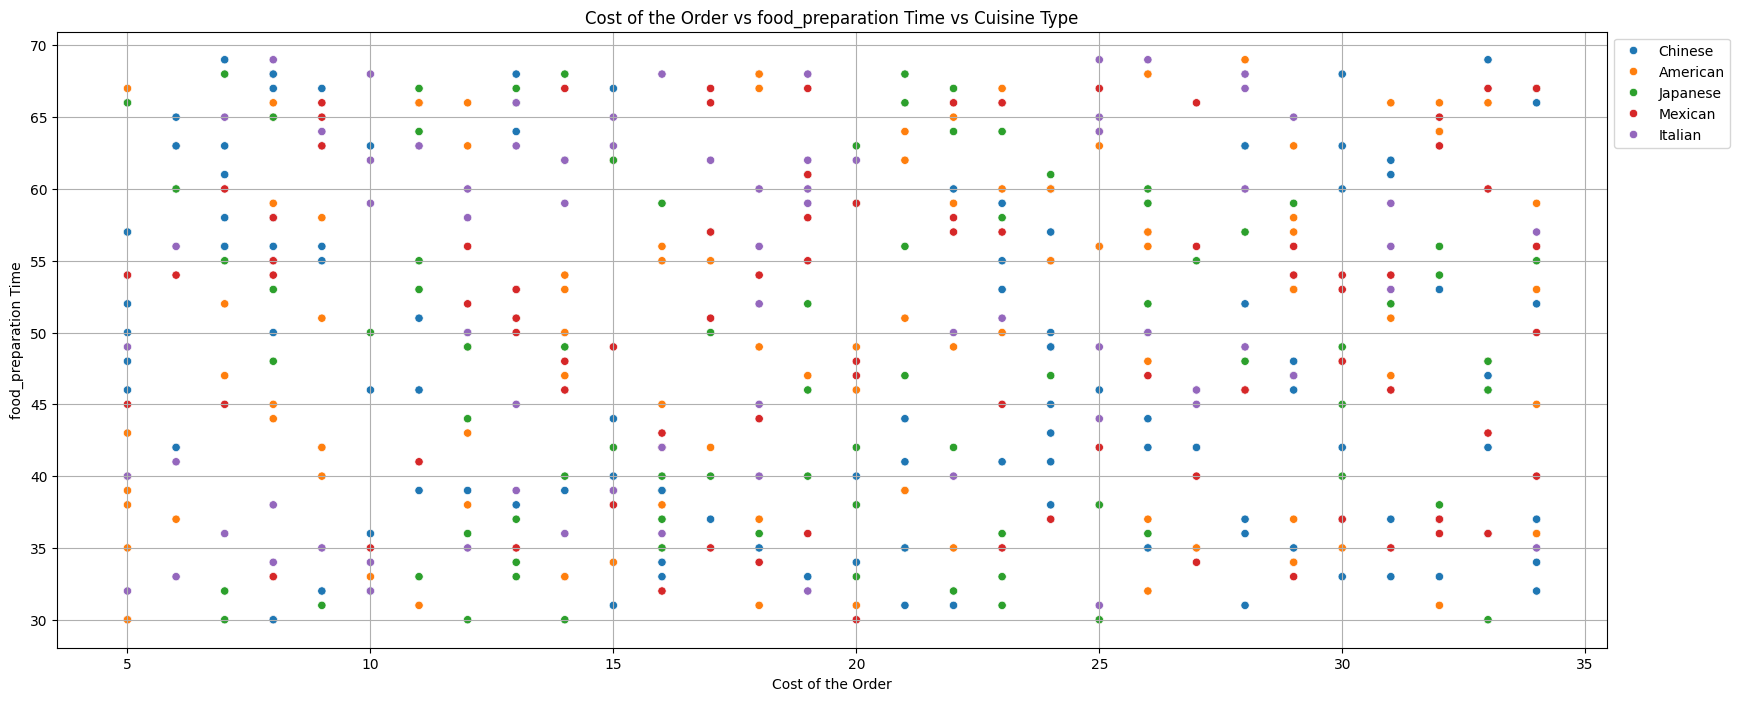

In [ ]:
# As from method of sampling suggested on COMMUNITY BLOCK of dashboard
# Making a Sample DataFrame for understanding the plot from above which is clustered
np.random.seed(0)  #random numbers generated that are reproducible
data = {"cost_of_the_order": np.random.randint(5, 35, 500), #sample size of 500
    "food_preparation_time": np.random.randint(30, 70, 500),
    "cuisine_type": np.random.choice(['American','Japanese','Italian','Chinese','Mexican' ], 500)} #considering top 5 restaurants
sample_df = pd.DataFrame(data) # new sameple dataframe

plt.figure(figsize=(20, 8)) #size of the plot displayed
sns.scatterplot(x="cost_of_the_order", y="food_preparation_time", hue="cuisine_type", data=sample_df) #making a plot for sample for sample
plt.title("Cost of the Order vs food_preparation Time vs Cuisine Type")
plt.xlabel("Cost of the Order") # x-axis label
plt.ylabel("food_preparation Time") # y-axis label
plt.legend(title="Cuisine Type") # legend box title
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # adjusting the legend box out of plot for readability
plt.grid(True) #grid view for easy understanding of placement of datapoints
plt.show()

---
**Insight**
* There is no strong correlation between food preparation time and cost of the oreder even with respect to the cuisine type ordered. ex-The most ordered cuisine American cuisine type has cost of 5$ with preparation time more too.
* The same no strong correlation is seen in the bivariate analysis of cost of order to time of preparation .
* This might be cause of efficiency of staff preparing the food who manage the time constraint irrespective to cuisine type.
---

##### 4. **`rating` vs. `food_preparation_time` vs. `cuisine_type`**

**TARGET**
* Check if a particular cuisine type impacts the time taken for its preparation inturn affecting the rating by the customer.

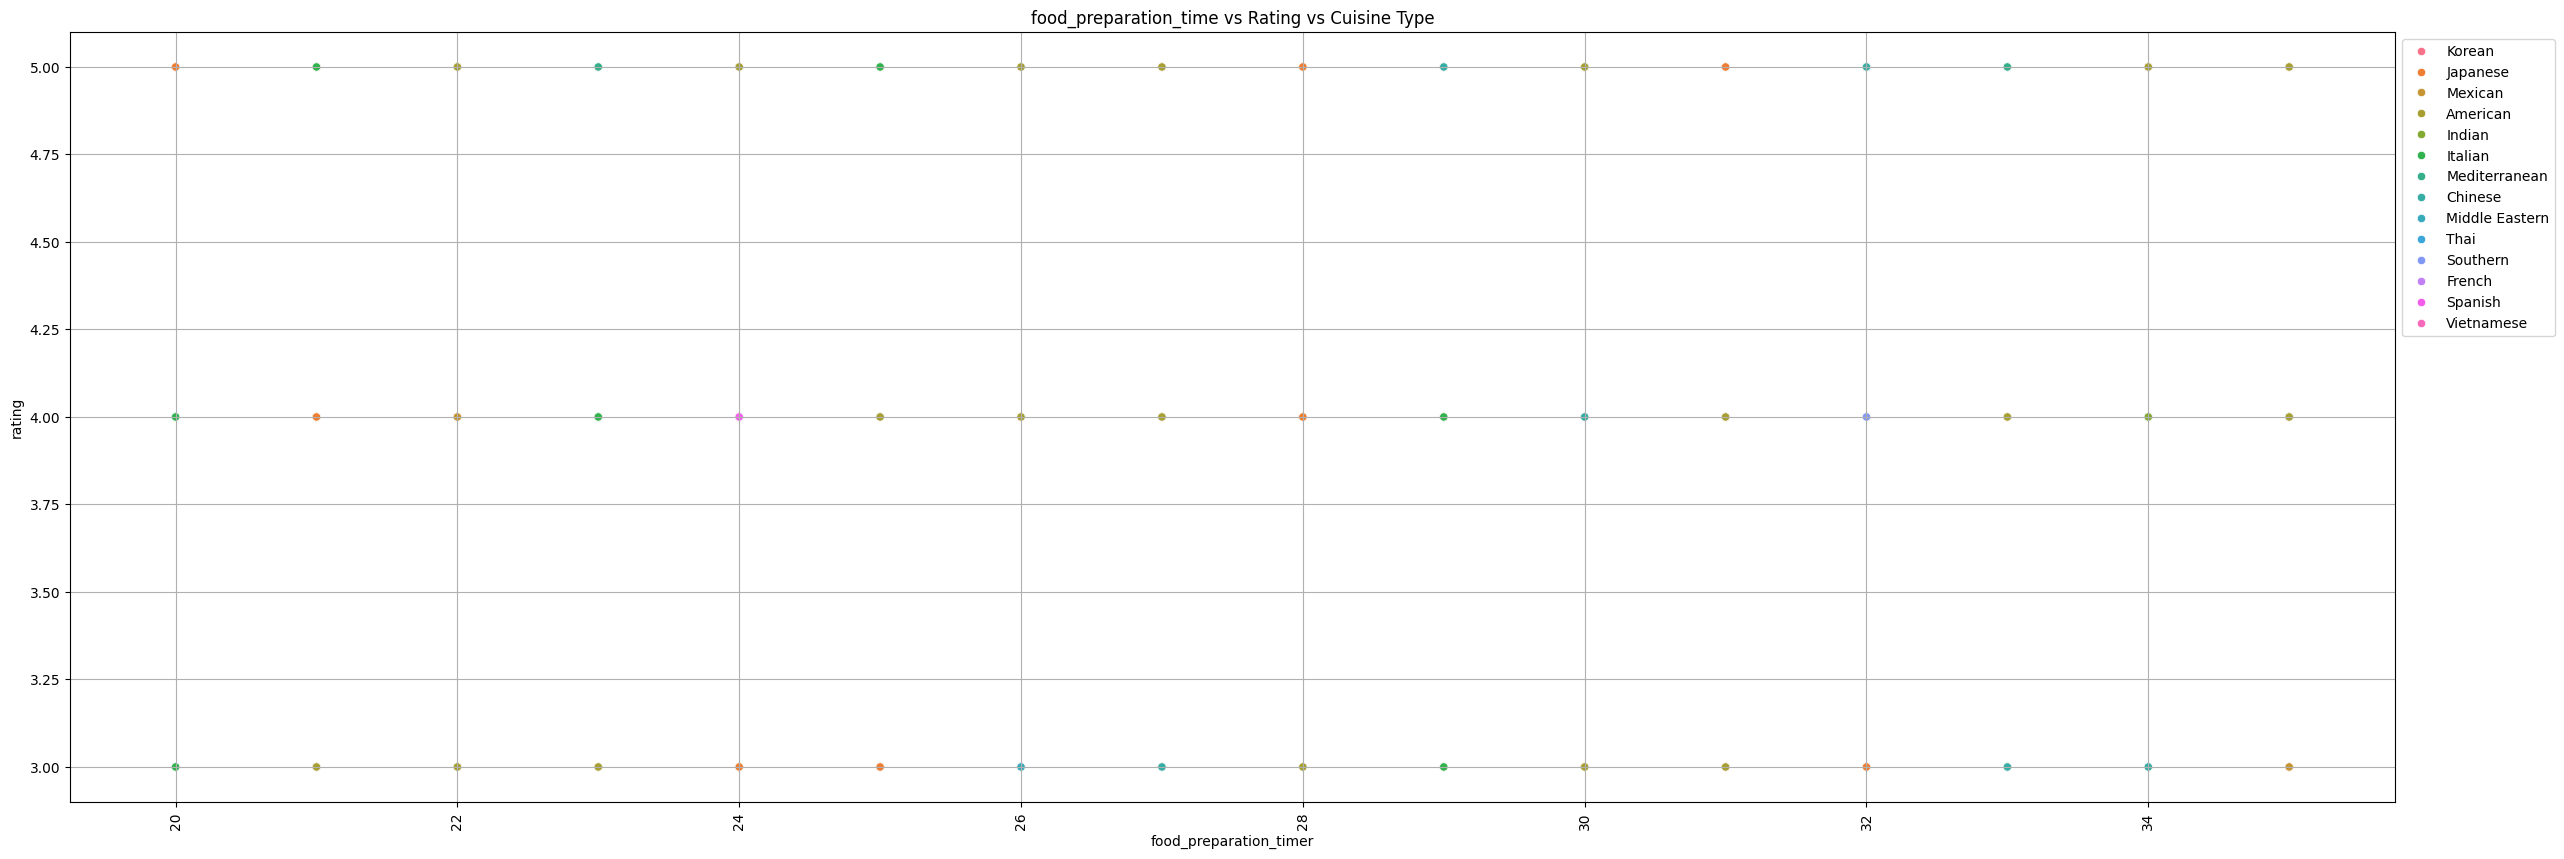

In [ ]:
# Analyzing using scatterplot
plt.figure(figsize=(30, 10)) #size of the plot displayed
sns.scatterplot(x="food_preparation_time", y="rating", hue="cuisine_type", data=df)
plt.title("food_preparation_time vs Rating vs Cuisine Type") # heading of the plot
plt.xlabel("food_preparation_timer") # x-axis label
plt.ylabel("rating") # y-axis label
plt.legend(title="cuisine type")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

---
**Insight**


*   There is no impact of cuisine type on food preparation time as well as on the rating.




---

##### 5. **`cost_of_the_order` vs. `food_preparation_time` vs. `restaurant_name`**


**TARGET**
* Check if particular restaurant has unusally high cost of order or longer food preparation time.

In [ ]:
# Analyzing using scatterplot
plt.figure(figsize=(30, 10)) #size of the plot displayed
sns.scatterplot(x="cost_of_the_order", y="food_preparation_time", hue="restaurant_name", data=df)
plt.title("Cost of the Order vs food_preparation_time vs restaurant_name") # heading of the plot
plt.xlabel("Cost of the Order") # x-axis label
plt.ylabel("food_preparation_time") # y-axis label
plt.legend(title="restaurant_name")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

* Areas with a cluster of points indicate common cost and preparation time ranges
* With large set of 178 restaurants registered on app analzing them all togather is hard
* considering a sample set with top 5 restaurants with highest orders.

In [ ]:
df['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

In [ ]:
# As from method of sampling suggested on COMMUNITY BLOCK of dashboard
# Making a Sample DataFrame for understanding the plot from above which is clustered
np.random.seed(0)  #random numbers generated that are reproducible
data = {"cost_of_the_order": np.random.randint(5, 35, 100), #sample size of 100
    "food_preparation_time": np.random.randint(30, 70, 100),
    "restaurant_name": np.random.choice(['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken','Parm' ], 100)} #considering top 5 restaurants
sample_df = pd.DataFrame(data) # new sameple dataframe

plt.figure(figsize=(12, 6)) #size of the plot displayed
sns.scatterplot(x="cost_of_the_order", y="food_preparation_time", hue="restaurant_name", data=sample_df,) #making a plot for sample for sample
plt.title("Cost of the Order vs food_preparation_time vs Restaurant Name")
plt.xlabel("Cost of the Order") # x-axis label
plt.ylabel("Food Preparation Time") # y-axis label
plt.legend(title="restaurant_name") # legend box title
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # adjusting the legend box out of plot for readability
plt.grid(True) #grid view for easy understanding of placement of datapoints
plt.show()

---
 **Insight**
 * There is variability in preparation times for orders of similar costs ( The Meatball Shop).
 * There is variablity in cost for same preparation time taken for some orders (blue ribbon fried chicken)
 * There is no much correlation exhibited amoung food prepataion time and cost for top five restaurant considering a sample
 * There is unusally high cost and time taken for some orders compared to others but no particular pattern astablished.
 ---

##### 6. **`delivery_time` vs. `cost_of_the_order` vs. `restaurant_name`**


**TARGET**
* Check if particular restaurant cost high bill or takes unusually high time impacting delivery time

In [ ]:
# Analyzing using scatterplot
plt.figure(figsize=(30, 10)) #size of the plot displayed
sns.scatterplot(x="cost_of_the_order", y="delivery_time", hue="restaurant_name", data=df)
plt.title("Cost of the Order vs delivery_time vs restaurant_name") # heading of the plot
plt.xlabel("Cost of the Order") # x-axis label
plt.ylabel("delivery_time") # y-axis label
plt.legend(title="restaurant_name")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

* Areas with a cluster of points indicate common cost and delivery time ranges
* With large set of 178 restaurants registered on app analzing them all togather is hard
* considering a sample set with top 5 restaurants with highest orders.

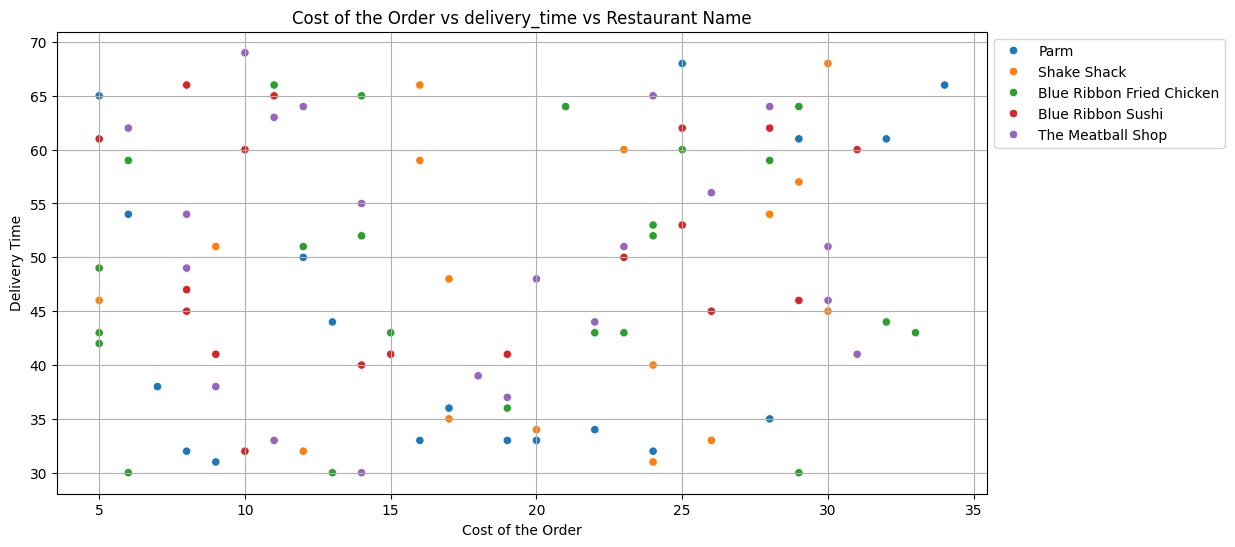

In [ ]:
# As from method of sampling suggested on COMMUNITY BLOCK of dashboard
# Making a Sample DataFrame for understanding the plot from above which is clustered
np.random.seed(0)  #random numbers generated that are reproducible
data = {"cost_of_the_order": np.random.randint(5, 35, 100), #sample size of 100
    "delivery_time": np.random.randint(30, 70, 100),
    "restaurant_name": np.random.choice(['Shake Shack','The Meatball Shop','Blue Ribbon Sushi','Blue Ribbon Fried Chicken','Parm' ], 100)} #considering top 5 restaurants
sample_df = pd.DataFrame(data) # new sameple dataframe

plt.figure(figsize=(12, 6)) #size of the plot displayed
sns.scatterplot(x="cost_of_the_order", y="delivery_time", hue="restaurant_name", data=sample_df,) #making a plot for sample for sample
plt.title("Cost of the Order vs delivery_time vs Restaurant Name")
plt.xlabel("Cost of the Order") # x-axis label
plt.ylabel("Delivery Time") # y-axis label
plt.legend(title="restaurant_name") # legend box title
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # adjusting the legend box out of plot for readability
plt.grid(True) #grid view for easy understanding of placement of datapoints
plt.show()

---
 **Insight**
 * There is variability in delivery times for orders of similar costs ( The blue ribbon sushi).
 * There is variablity in cost for same delivery time taken for some orders (blue ribbon fried chicken)
 * There is no much correlation exhibited amoung food delivery time and cost for top five restaurant considering a sample
 * There is unusally high cost and time taken to deliver for some orders compared to others but no particular pattern astablished.
---

##### 7. **`rating` vs. `food_preparation_time` vs. `day_of_the_week`**


**TARGET**
* check if rating and preparation time of food is impacted by the day of the week

<Figure size 1000x500 with 0 Axes>

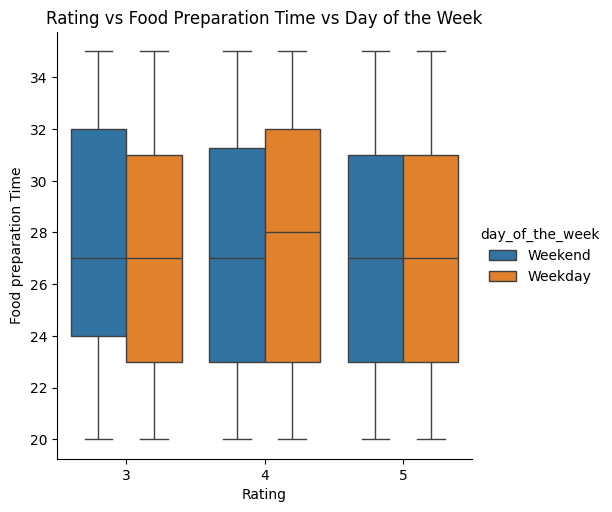

In [ ]:
#Analyzing using boxplot
plt.figure(figsize=(10, 5)) #size of the plot displayed
sns.catplot(x="rating", y="food_preparation_time", hue="day_of_the_week", data=df,kind='box')
plt.title("Rating vs Food Preparation Time vs Day of the Week") # heading of the plot
plt.xlabel("Rating") # x-axis label
plt.ylabel("Food preparation Time") # y-axis label
plt.show()

---
**Insight**
* Median of  food preparation times are  almost same across ratings but differ slightly between weekends and weekday in case of rating 4.
* No outliers indicate there is no extremely high time taken doe delivery nor super quick deliveries happening.
---


##### 8. **`rating` vs. `delivery_time` vs. `day_of_the_week`**



**TARGET:**
* Know weekends or weekdays which one have higher or lower delivery times and how these times impact customer ratings.

<Figure size 1000x500 with 0 Axes>

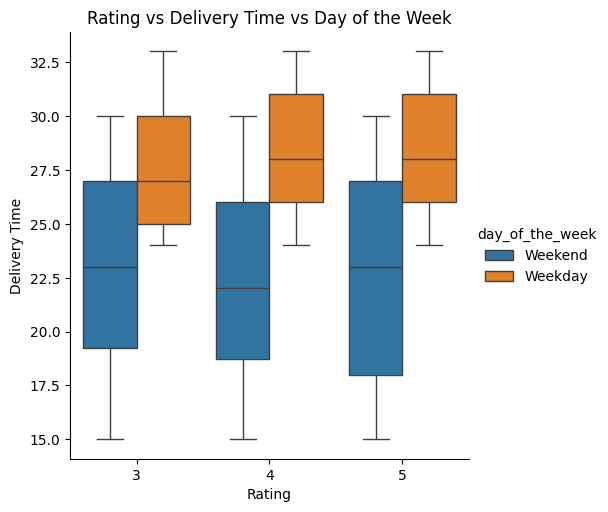

In [ ]:
#Analyzing using boxplot
plt.figure(figsize=(10, 5)) #size of the plot displayed
sns.catplot(x="rating", y="delivery_time", hue="day_of_the_week", data=df,kind='box')
plt.title("Rating vs Delivery Time vs Day of the Week") # heading of the plot
plt.xlabel("Rating") # x-axis label
plt.ylabel("Delivery Time") # y-axis label
plt.show()

---
**Insight**
* As in bivariate numerical analysis, Rating and delivery time slight negative correlation
*  Weekday delivery times are slightly higher than weekend delivery times for each rating category.
* These are't impacting the rating by customer but day of the week is imacting the delivery time of the order.
---

# Question 13:
The company wants to provide a promotional offer in the
advertisement of the restaurants. The condition to get the offer is that
the restaurants must have a rating count of more than 50 and the
average rating should be greater than 4. Find the restaurants fulfilling
the criteria to get the promotional offer. [3 marks]


In [ ]:
# Group by restaurant_name and calculate the count and average of the ratings
grouped = df.groupby('restaurant_name').agg(count=('rating', 'count'),average=('rating', 'mean')).reset_index()
eligible_restaurants = grouped[(grouped['count'] > 50) &(grouped['average'] > 4)] # Filter based on the given conditons

print(eligible_restaurants)


               restaurant_name  count   average
20   Blue Ribbon Fried Chicken     96  4.552083
21           Blue Ribbon Sushi    119  4.521008
109                       Parm     68       4.5
121           RedFarm Broadway     59  4.474576
122             RedFarm Hudson     55  4.490909
136                Shake Shack    219  4.561644
153          The Meatball Shop    132  4.689394


---
**Insight**
* The above conditions of rating count and average rating being above 4 is satisfied 7 restaurants which are eligible for PROMOTIONAL OFFER


---


  **RESTAURANT NAME ------------COUNT / AVERAGE**


---


1. Blue Ribbon Fried Chicken ---     96   /  4.552083
2. Blue Ribbon Sushi          ---   119   / 4.521008
3. Parm                       ---   68     /4.5
4. RedFarm Broadway              ---59  /   4.474576
5. RedFarm Hudson                ---55   /  4.490909
6. Shake Shack                  --- 219   / 4.561644
7. The Meatball Shop            --- 132    /4.689394
  

---

# Question 14:
The company charges the restaurant 25% on the orders
having cost greater than 20 dollars and 15% on the orders having cost
greater than 5 dollars. Find the net revenue generated by the company
across all orders. [3 marks]

In [ ]:
# calculating the commision charged by the company
def calculate_net_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25  # 25% on orders cost more than 20 $
    if cost_of_the_order > 5:
        return cost_of_the_order * 0.15 # 15% on orders cost more than 5 $

# calculating the net revenue
df['net_revenue'] = df['cost_of_the_order'].apply(calculate_net_revenue)
print('Revenue Generated By The Company :',df['net_revenue'].sum(),"$")


#calculating the total revenue which is sum of commision charged by the company as well as restaurant bill
# Total amount paid by the customer for these orders (ignoring taxes and other charges if any)
def calculate_total_revenue(cost_of_the_order):
    if cost_of_the_order > 20:
        return cost_of_the_order * 0.25 +cost_of_the_order # 25% on orders cost more than 20 $
    if cost_of_the_order > 5:
        return cost_of_the_order * 0.15 +cost_of_the_order  # 15% on orders cost more than 5 $

# calculating the total revenue
df['total_revenue'] = df['cost_of_the_order'].apply(calculate_total_revenue)
print('Total Amount Paid By The Customers :',df['total_revenue'].sum(),"$")

Revenue Generated By The Company : 6166.303 $
Total Amount Paid By The Customers : 37438.383 $


---
**Insight**


*   The commision charged by the company for the orders above 20 dollars being "25%" and for the orders above 5 dollars being 15% will generate a revenue for the company  of  **"6166.303 dollars"**




---

# Question 15:
The company wants to analyze the total time required to
deliver the food. What percentage of orders take more than 60
minutes to get delivered from the time the order is placed? (The food
has to be prepared and then delivered.) [2 marks]


In [ ]:
#analysing total delivery time
# customer_wait_time column = food preparation time + delivery time taken
number_of_orders_abv_60_minutes = len(df[df['customer_wait_time'] > 60])
percentage_orders_abv_60_minutes = (number_of_orders_abv_60_minutes / len(df)) * 100
print("Percentage of orders that take more than 60 minutes to get delivered:",round(percentage_orders_abv_60_minutes,2),"%")


Percentage of orders that take more than 60 minutes to get delivered: 10.54 %


---
**Insight**
* The  percentage of orders take more than 60 minutes to get delivered from the time the order is placed is **10.54%**
* The total time is kind of more considering 60min ,this might be cause of bulk ordered quantity but incase it is because of traffic or miscellaneous reasons , cause should be analyzed
---

# Question 16:
The company wants to analyze the delivery time of the
orders on weekdays and weekends. How does the mean delivery time
vary during weekdays and weekends? [2 marks]


In [ ]:
df['day_of_the_week'].value_counts()

day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64

In [ ]:
# mean delivery time on weekend
mean_delivery_time_weekend = df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
print("Mean delivery time on weekend:", mean_delivery_time_weekend, "minutes")

# mean delivery time on weekday
mean_delivery_time_weekday = df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
print("Mean delivery time on weekday:", mean_delivery_time_weekday, "minutes")

# variation in mean delivery time on weekdays ,weekends
mean_variation = -mean_delivery_time_weekend + mean_delivery_time_weekday
print("Mean delivery time variation:", mean_variation, "minutes")

Mean delivery time on weekend: 22.4700222057735 minutes
Mean delivery time on weekday: 28.340036563071298 minutes
Mean delivery time variation: 5.870014357297798 minutes


---
**Insights**
* Mean delivery time on weekend: 97811.0 minutes
* Mean delivery time on weekday: 97811.0 minutes
* Mean delivery time variation: 5.87 minutes
* The mean delivery time variation being ***5.87mins***   indicates that delivery on weekends take almost same average time as on weekdays.
---

# Question 17:
What are your conclusions from the analysis? What
recommendations would you like to share to help improve the
business? (You can use cuisine type and feedback ratings to drive your
business recommendations.) [6 marks]




---
#### **Conclusions**
---
* **Restaurant names :** The top ordered restaurants should be priortized in maitaining the demand and least opted restaurants need attention in promotion and reasons should be drilled in order to increase their orders,least ordered restaurants should be advertised a little and give data regarding the customer orderpatterns etc which might help in improving their menu , order quality etc.

* **Customer ids :** Customers who make frequent orders should have some benefits so as to not lose them and maintain their loyality .

* **Day of the week:** Weekday vs. Weekend Orders have noticeable difference in number of orders. With regards to this strategies to maintain the demand on weekends and increase the demand on weekdays has to be planned

* **Cuisine Types:** Certain cuisine types are more popular than others, with some being ordered very infrequently. Popular cuisines should be prioritized for strategies with respect to ratings .

* **Orders :** There are some restaurants with significantly lower orders that need attention.and top restaurants with lots of orders should be assisted with more dleivery personnels.


* **Food preparation time :**  Longer preparation times may correlate with lower ratings , decrease in food preparation time can decrease customers waiting time

* **Cost of order :** The cost of orders have outliers indicating either very high or very low order values which means there are bulk or huge orders made ,such customers should be held on.


* **Delivery Times:**  Longer delivery times may result in lower ratings, especially during peak hours.This is pne such factor that foodhub aggregators have a complete control on .Hence strategies which reduce the delivery time taken should be implemented


* **Ratings :** The majority of the restaurants have high ratings, indicating overall customer satisfaction.Hence there must me initatives to maintain these ratings and improve the services updating the short commings.

---




---
#### **Recommendations**
---
THE FOODHUB AGGREGATORS ARE SERVICE PROVIDERS TO BOTH RESTAURANTS REGISTERED ON APP AND CUSTOMERS MAKING ORDERS THROUGH APP.


*   **Recommendations with regards to CUSTOMERS placing orders on app**
    * Maintain a user friendly interface of the app with constant updates of cuisine types , registered restaurants which are located in closer proximity, deals , subscriptions etc
    * Maintain customer feedback portal , rating portal and quick issue resolving system. Cashbacks etc to encourage review writtings and ratings
    * Frequent customers should be given speacial discounts or offer or scrach cards which encourage them to place future orders.
    * Targeting customer placing bulk orders with discounts can help maintain their loyality.
    * Recommending new restaurants or cuisine types updates in menu help in exploring new cuisines and dishes which increase their interest towards prefering the app.
    * Provide real-time order tracking and updates to keep customers informed about their order status
    * Ensuring safe and hassle-free payments with multiple options of payments.
    * Providing referral program to encourage customers to invite friends and family.
    .



*   **Recommendations with regards to RESTAURANTS registered on app**
    * High demand restaurants like Shake Shack ,The Meatball Shop ,Blue Ribbon Sushi ,Blue Ribbon Fried Chicken ,Parm should be promoted with special discounts in order to maintain demand and increase orders of the restaurants.
    * Providing info about customer reviews regarding the dish ordered in order to encourage and improve any short comes .
    * Providing the restaurants with the demand or customer order patterns on app so they manage the preparation time of the cuisine in demand and special demand on weekends  with data
    * Least preferred restaurants need to be promoted with special offers or discounts so customers tend to try them .A little advertisement on app in recommendations to customers can promote the sales.
    * A through check on menu of the restaurants , improving their food quality, service, and delivery times need to be analized to help them improve and remoulded with demanded type of cuisine etc.
    * To increase the demand on weekdays restaurants should bring items in menu which take less preparation time , affordable and easy to eat that can attract working proffessionals.Give special points or regular member cards/subscriptions for frequent weekday orders.


  

    

* **Recommendations to FOODHUB app**
     * Maintain a user friendly interface of the app with constant updates ,simplify navigation and reduce the number of steps to complete an order.

     * Use  andvanced techniques of AI and machine learning to provide personalized recommendations and deals based on user behavior and preferences and understanding the traffic hours or order frequency hours etc.

  * Highlight ongoing promotions,offers and discounts prominently within the app which are exclusive in-app deals

  * Maintain sufficient  and efficient delivery personnels that compensate the demand specifically on weekends.

  * Provide real-time tracking , instant customer assistance , extra tips to quick delivery etc .

  * Maintain security measures to protect user data and transaction information.
  
  * Encourage customers to leave reviews and ratings for restaurants and their orders.Use it to continuously improve app features and service quality.
    







# Question:13 [CASE WHERE RATINGS IS DIFFERENTLY TREATED]

The company wants to provide a promotional offer in the
advertisement of the restaurants. The condition to get the offer is that
the restaurants must have a rating count of more than 50 and the
average rating should be greater than 4. Find the restaurants fulfilling
the criteria to get the promotional offer. [3 marks]


In [ ]:
#Importing  the necessary libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

# mounted to drive
from google.colab import drive
drive.mount('/content/drive')
# Reading a data file
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/foodhub_order.csv')

df.info() # gives info of the dataframe
data= df.copy() # making a copy of the dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


* There are 1162 entries which have a rating i.e "not given" is not their entry.

In [ ]:
# Drop rows where the rating is 'Not given'
data = data[data['rating'] != 'Not given']

# Convert 'rating' to numeric
data['rating'] = pd.to_numeric(data['rating'])

# Group by restaurant name and calculate the count and mean of ratings
restaurant_ratings = data.groupby('restaurant_name').agg(
    rating_count=('rating', 'count'),
    average_rating=('rating', 'mean')
).reset_index()

# Filter the restaurants fulfilling the criteria
filtered_restaurants = restaurant_ratings[(restaurant_ratings['rating_count'] > 50) & (restaurant_ratings['average_rating'] > 4)]

print(filtered_restaurants)

               restaurant_name  rating_count  average_rating
16   Blue Ribbon Fried Chicken            64        4.328125
17           Blue Ribbon Sushi            73        4.219178
117                Shake Shack           133        4.278195
132          The Meatball Shop            84        4.511905
